In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]

import warnings
warnings.filterwarnings("ignore")
import statistics
import scipy
from scipy import stats
from scipy.stats import chi2_contingency,ttest_ind
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split


# import StandardScaler to perform scaling
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,recall_score,f1_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [141]:
df=pd.read_csv('lending_club_loan_two.csv')
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [142]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Datapoints has 26 features in which 12 are numerical float type and 15 are categorical type features and issue_d,earliest_cr_line to be in date format and open_acc,pub_acc,total_acc,mort_acc,pub_rec_bankruptcies to be in int format.

In [143]:
df['pub_rec'].count()

396030

In [144]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**Inference**


   1. count of all columns are different hence we can say that there are missing values in the Dataset.
   2.  minimum values are positive so there is no negative values in the dataset.
   3. difference between min and max are more so there are outliers.


In [145]:
df.describe(include='object').transpose() # statistical summary of categorical variables

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


**Inference**


    1) The loan term for most of the people in the dataset is 36 months
    2) Most of them have opted for grade 'B' and sub_grade 'B3' type of loan
    3) 31.8% of the people have 10+ years of experience
    4) 35.2% of the applicants verification status is 'VERIFIED'
    5) 80.38% of the people have 'FULLY PAID' the loan
    6) emp_title has 173105 unique values out of which most of the applicants are Teachers

In [146]:
df_num=df.select_dtypes(include=np.number).columns
df_num

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [147]:
df_cat=df.select_dtypes(include="object").columns
df_cat

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [148]:
print('df_num',df_num.shape[0])
print('df_cat',df_cat.shape[0])

df_num 12
df_cat 15


In [149]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [150]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [151]:
# Here our target variable is Loan Status and we have Fully Paid - 318357  Charged Off - 77673.
# our data is imbalanced so we have to apply SMOTE here.

In [152]:
df.duplicated().sum()
print(' ')
print(f'Dataset has {df.duplicated().sum()} duplicate values.')

 
Dataset has 0 duplicate values.


In [153]:
percent=df.isna().sum()*100/len(df)
percent

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [154]:
for i in df.columns:
    print('unique values',i,df[i].nunique())

unique values loan_amnt 1397
unique values term 2
unique values int_rate 566
unique values installment 55706
unique values grade 7
unique values sub_grade 35
unique values emp_title 173105
unique values emp_length 11
unique values home_ownership 6
unique values annual_inc 27197
unique values verification_status 3
unique values issue_d 115
unique values loan_status 2
unique values purpose 14
unique values title 48817
unique values dti 4262
unique values earliest_cr_line 684
unique values open_acc 61
unique values pub_rec 20
unique values revol_bal 55622
unique values revol_util 1226
unique values total_acc 118
unique values initial_list_status 2
unique values application_type 3
unique values mort_acc 33
unique values pub_rec_bankruptcies 9
unique values address 393700


In [155]:
df['issue_d'].unique() # we can seperate the months and columns

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [156]:
df['earliest_cr_line'].unique() # we can seperate the months and columns

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [157]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['earliest_cr_line_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_line_month']=df['earliest_cr_line'].dt.year


In [158]:
df.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   emp_title               373103 non-null  object 
 7   emp_length              377729 non-null  object 
 8   home_ownership          396030 non-null  object 
 9   annual_inc              396030 non-null  float64
 10  verification_status     396030 non-null  object 
 11  loan_status             396030 non-null  object 
 12  purpose                 396030 non-null  object 
 13  title                   394275 non-null  object 
 14  dti                 

###  Univariate Analysis

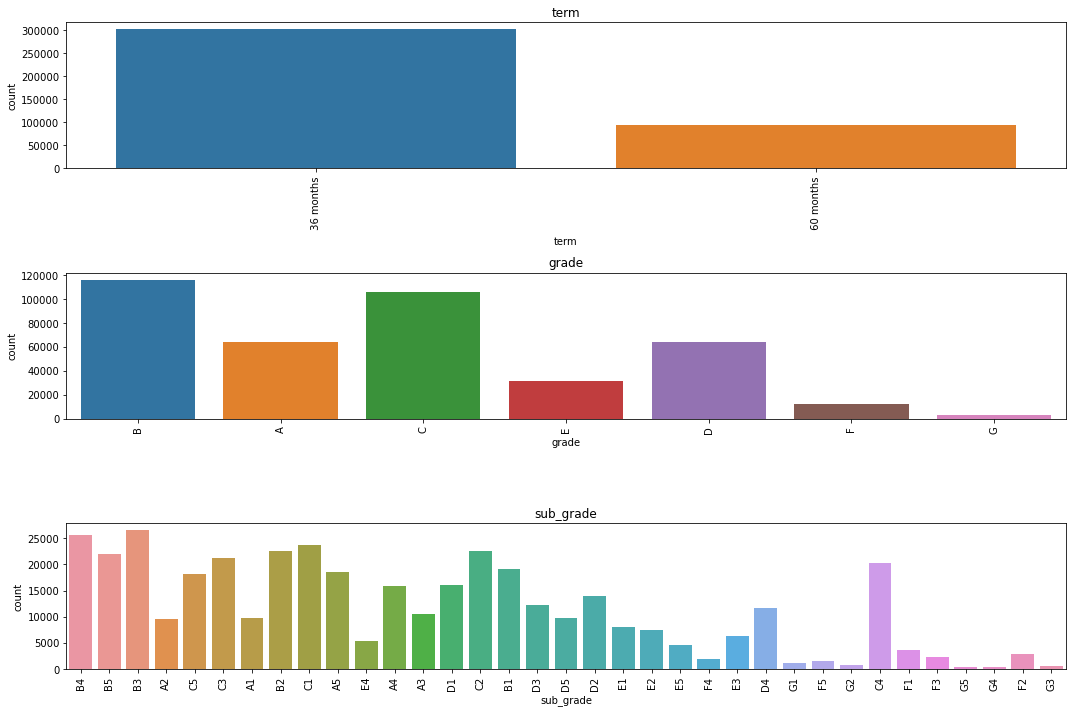

In [92]:
cols=['term', 'grade', 'sub_grade' ]

rows=3
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

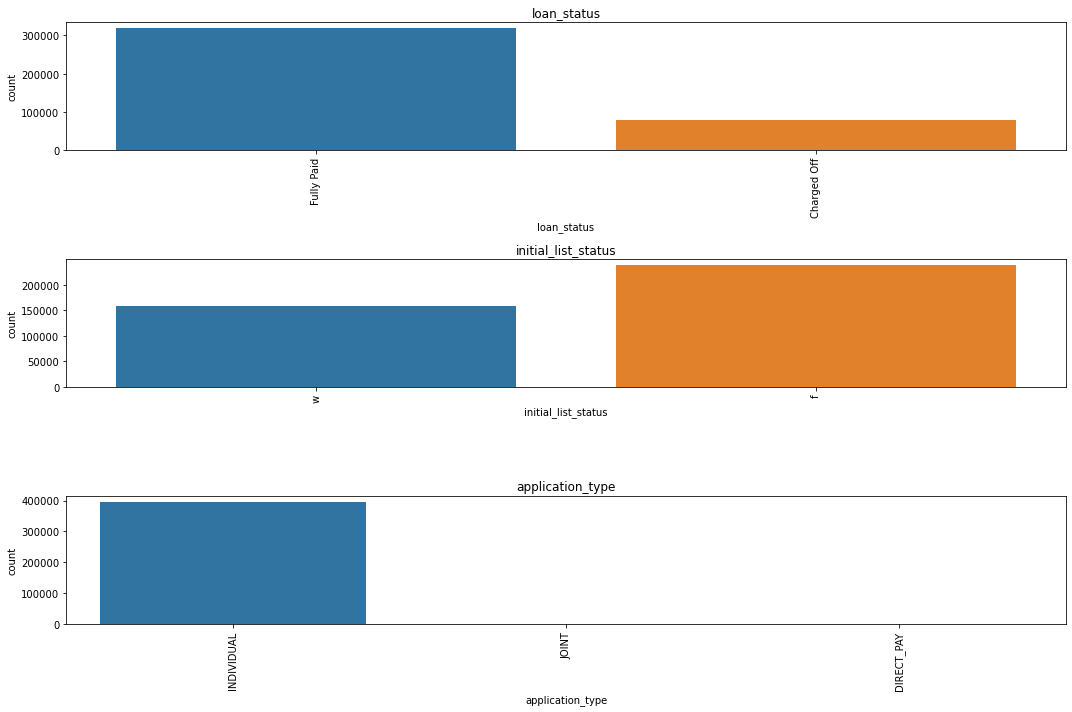

In [7]:
cols=['loan_status','initial_list_status','application_type']

rows=3
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

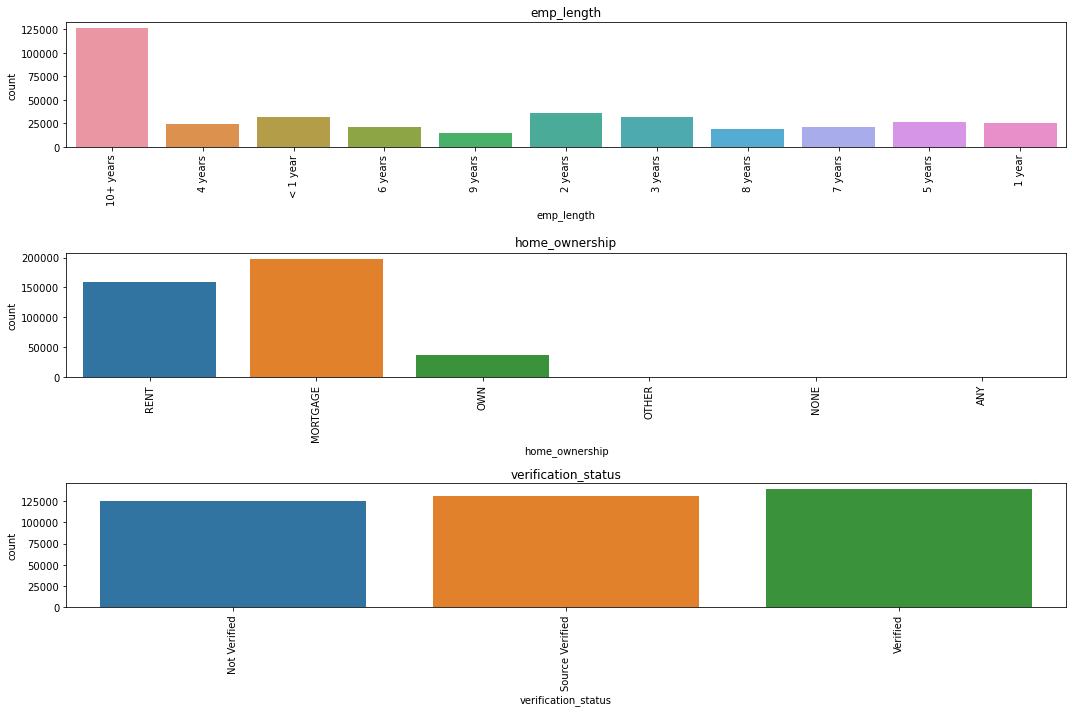

In [8]:
cols=[ 'emp_length','home_ownership', 'verification_status']

rows=3
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

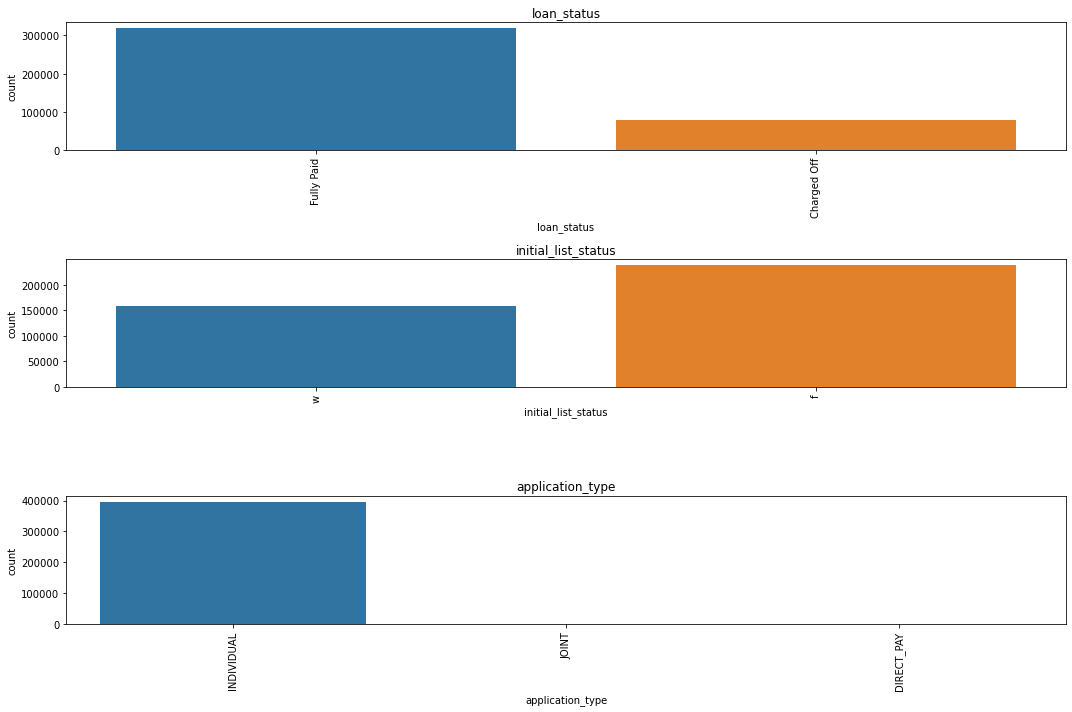

In [9]:
cols=['loan_status','initial_list_status','application_type']
rows=3
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

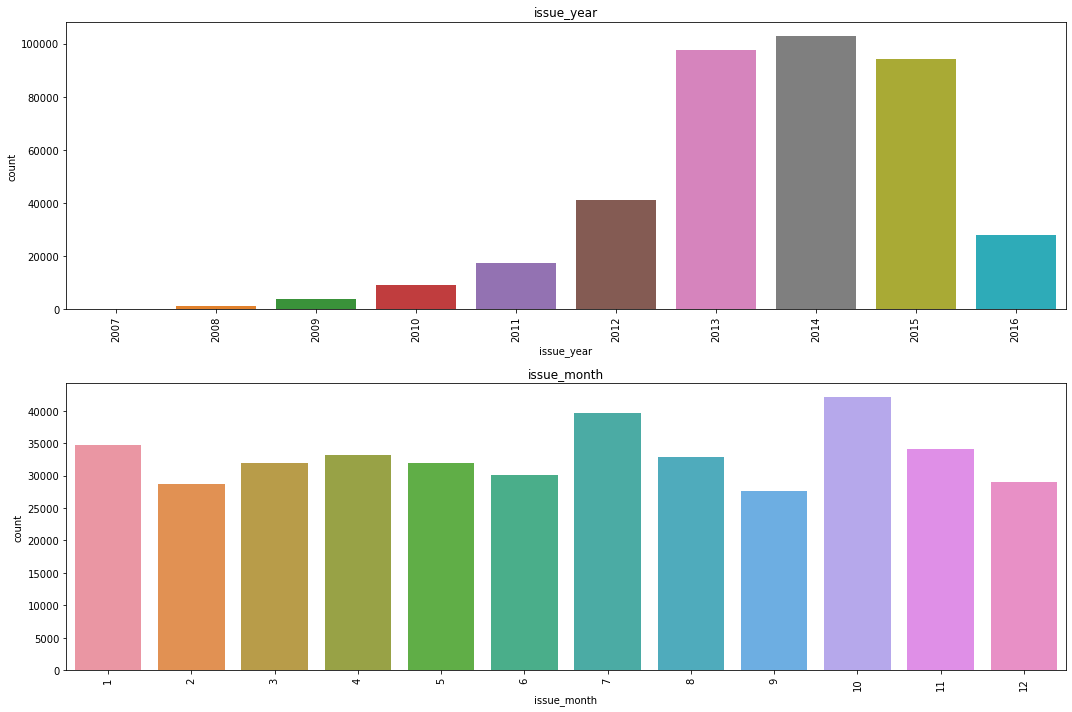

In [10]:
cols=['issue_year','issue_month']
rows=2
columns=1
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

1. Most of the loan issued in the year 2014 followed by 2013,2015.
2. Most of the loan issued in the month is October (10) in every year.

<function matplotlib.pyplot.show(close=None, block=None)>

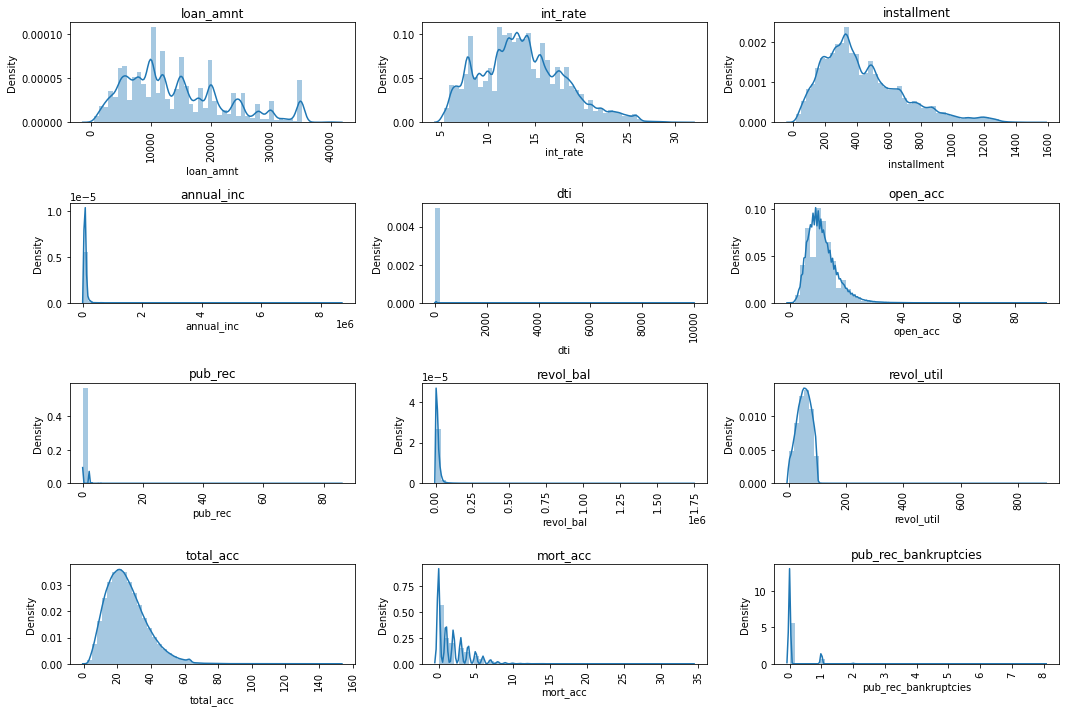

In [11]:
cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies']

rows=4
columns=3
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
    
plt.tight_layout() # will keep the plots in perfect shape 
plt.show

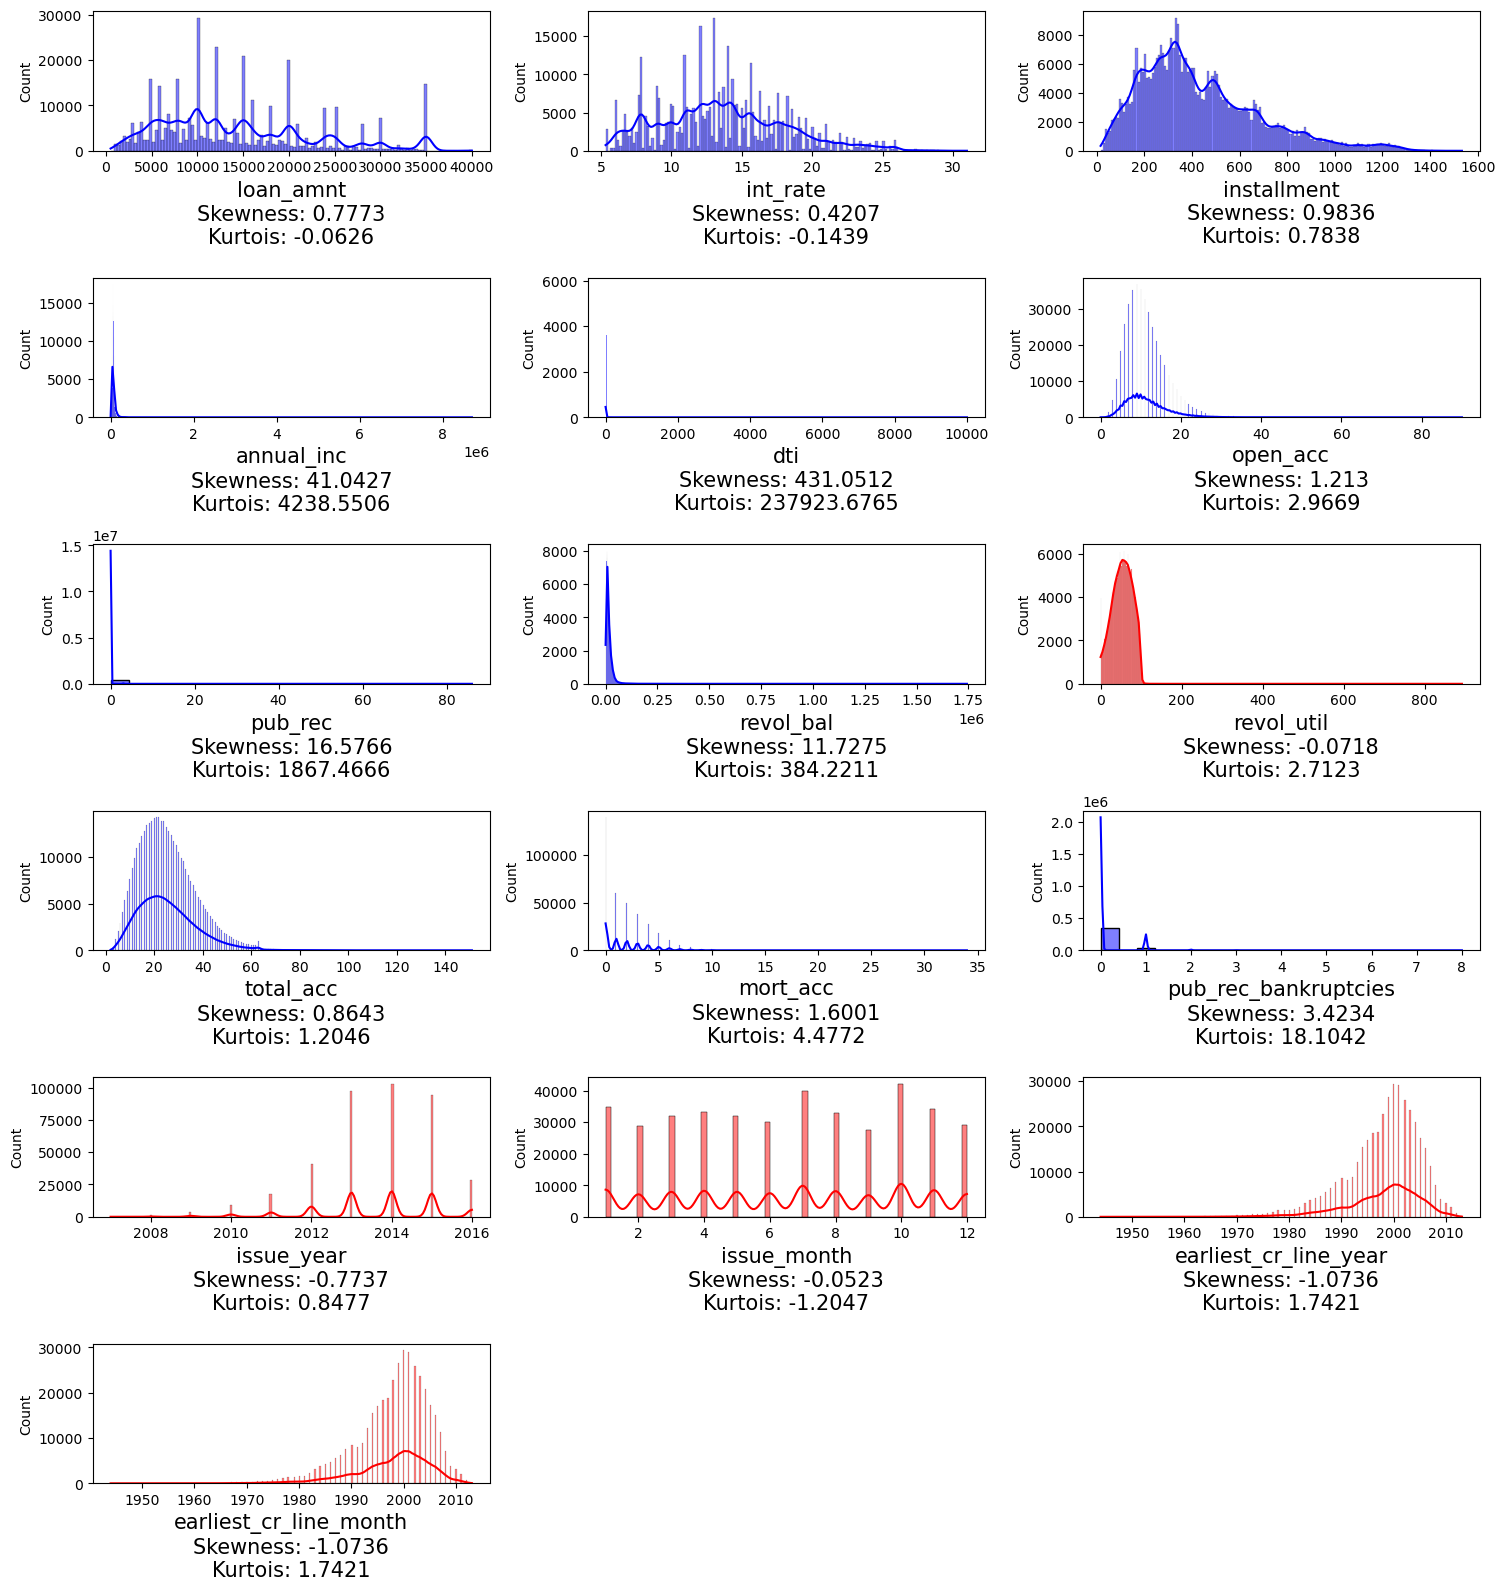

In [13]:
plt.figure(figsize=(15,16),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(6,3,n)
    n+=1
    if df[i].skew() < 0 :
        sns.histplot(df[i] ,color='red',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
    else:
        sns.histplot(df[i],color='blue',kde=True)
        plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}\nKurtois: {round(df[i].kurt(),4)}",fontsize=15)
plt.tight_layout()

In [13]:
df[df['revol_util']<0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month


In [ ]:
# here we can see that features in blue colour are positively skewed and features in red colour are negatively skewed

In [15]:
# Calculating top10 employee tittle and purpose
empl_10=df['emp_title'].value_counts().head(10)
loan_purp_10=df['purpose'].value_counts().head(10)

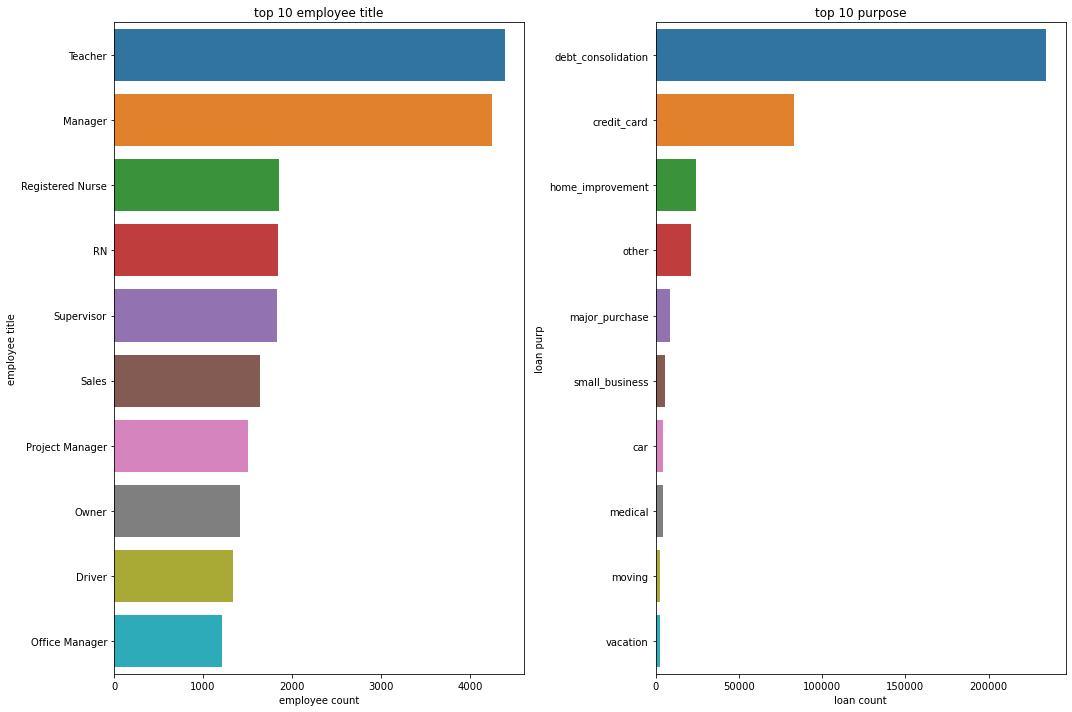

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(y=empl_10.index,x=empl_10.values)
plt.xlabel('employee count')
plt.ylabel('employee title')
plt.title('top 10 employee title')
plt.subplot(1,2,2)
sns.barplot(y=loan_purp_10.index,x=loan_purp_10.values)
plt.xlabel('loan count')
plt.ylabel('loan purp')
plt.title('top 10 purpose')
plt.tight_layout()
plt.show()

1. Most of the borrowers employement title is Teacher followed by Manager and Rgeistered Nurse.
2. Most of the borrowers, took the loan for debt_consolidation followed by credit card

# Bivarient Analysis

In [ ]:
# Annual income  more than 70000 are Fully Paid
# Annual income less than 70000 are Charged Off

<AxesSubplot:xlabel='installment', ylabel='Count'>

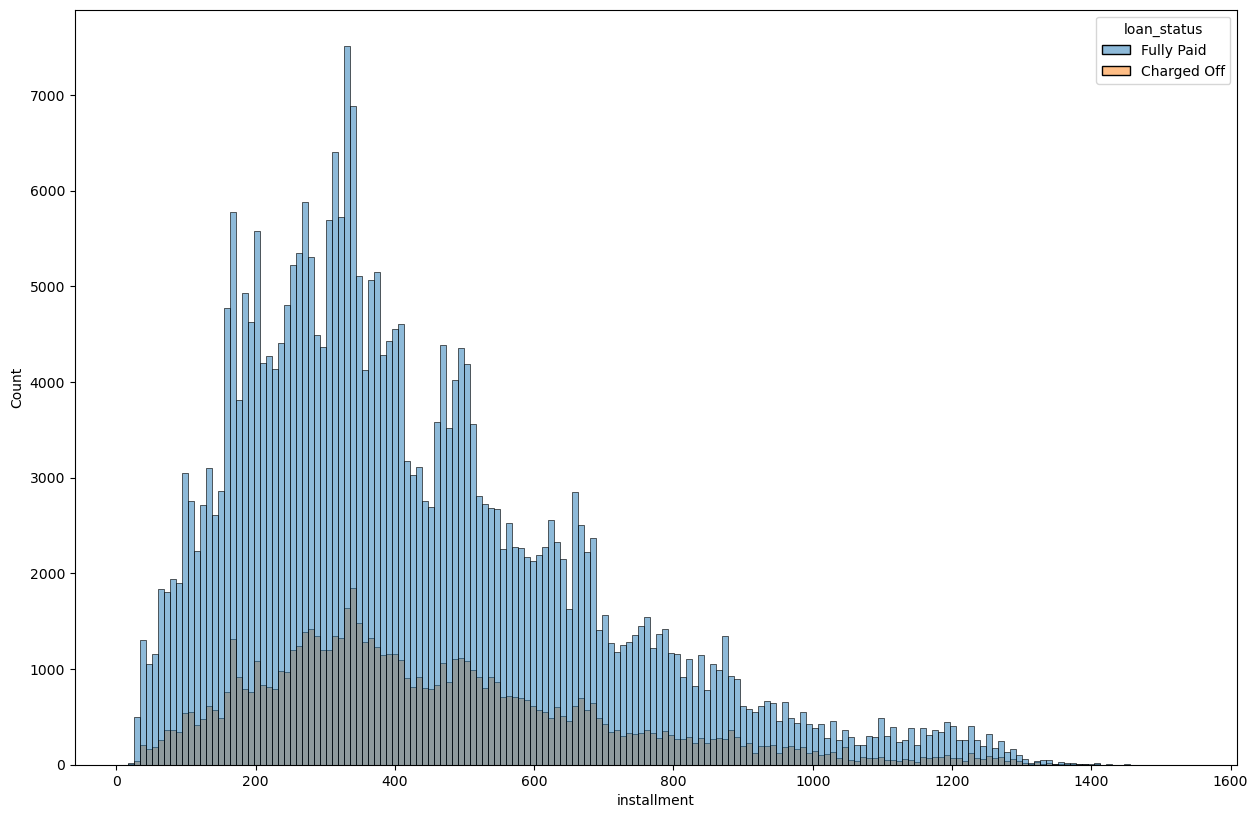

In [17]:
plt.figure(figsize=(15,10),dpi=100)
sns.histplot(x=df['installment'],hue=df['loan_status'])

In [ ]:
# installment between 200$ - 400$ has more defaulters

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

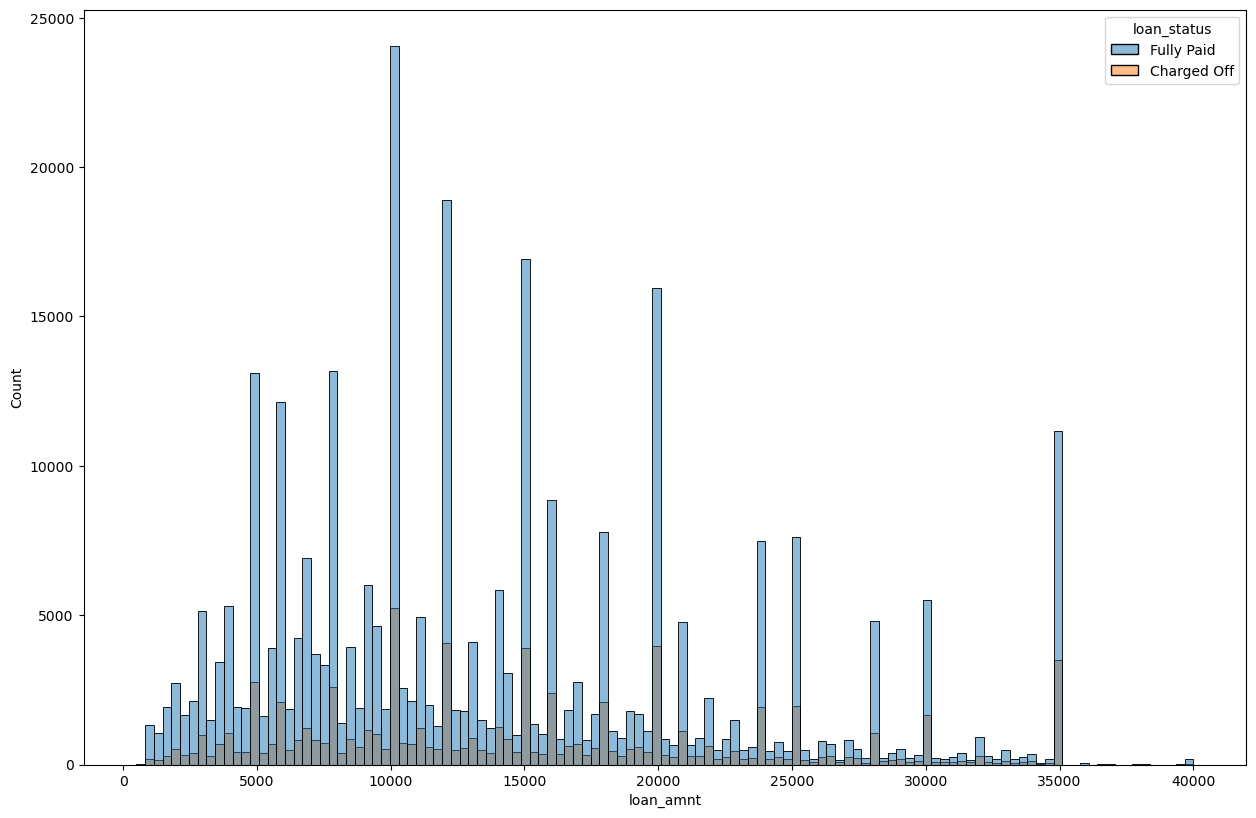

In [18]:
plt.figure(figsize=(15,10),dpi=100)
sns.histplot(x=df['loan_amnt'],hue=df['loan_status'])

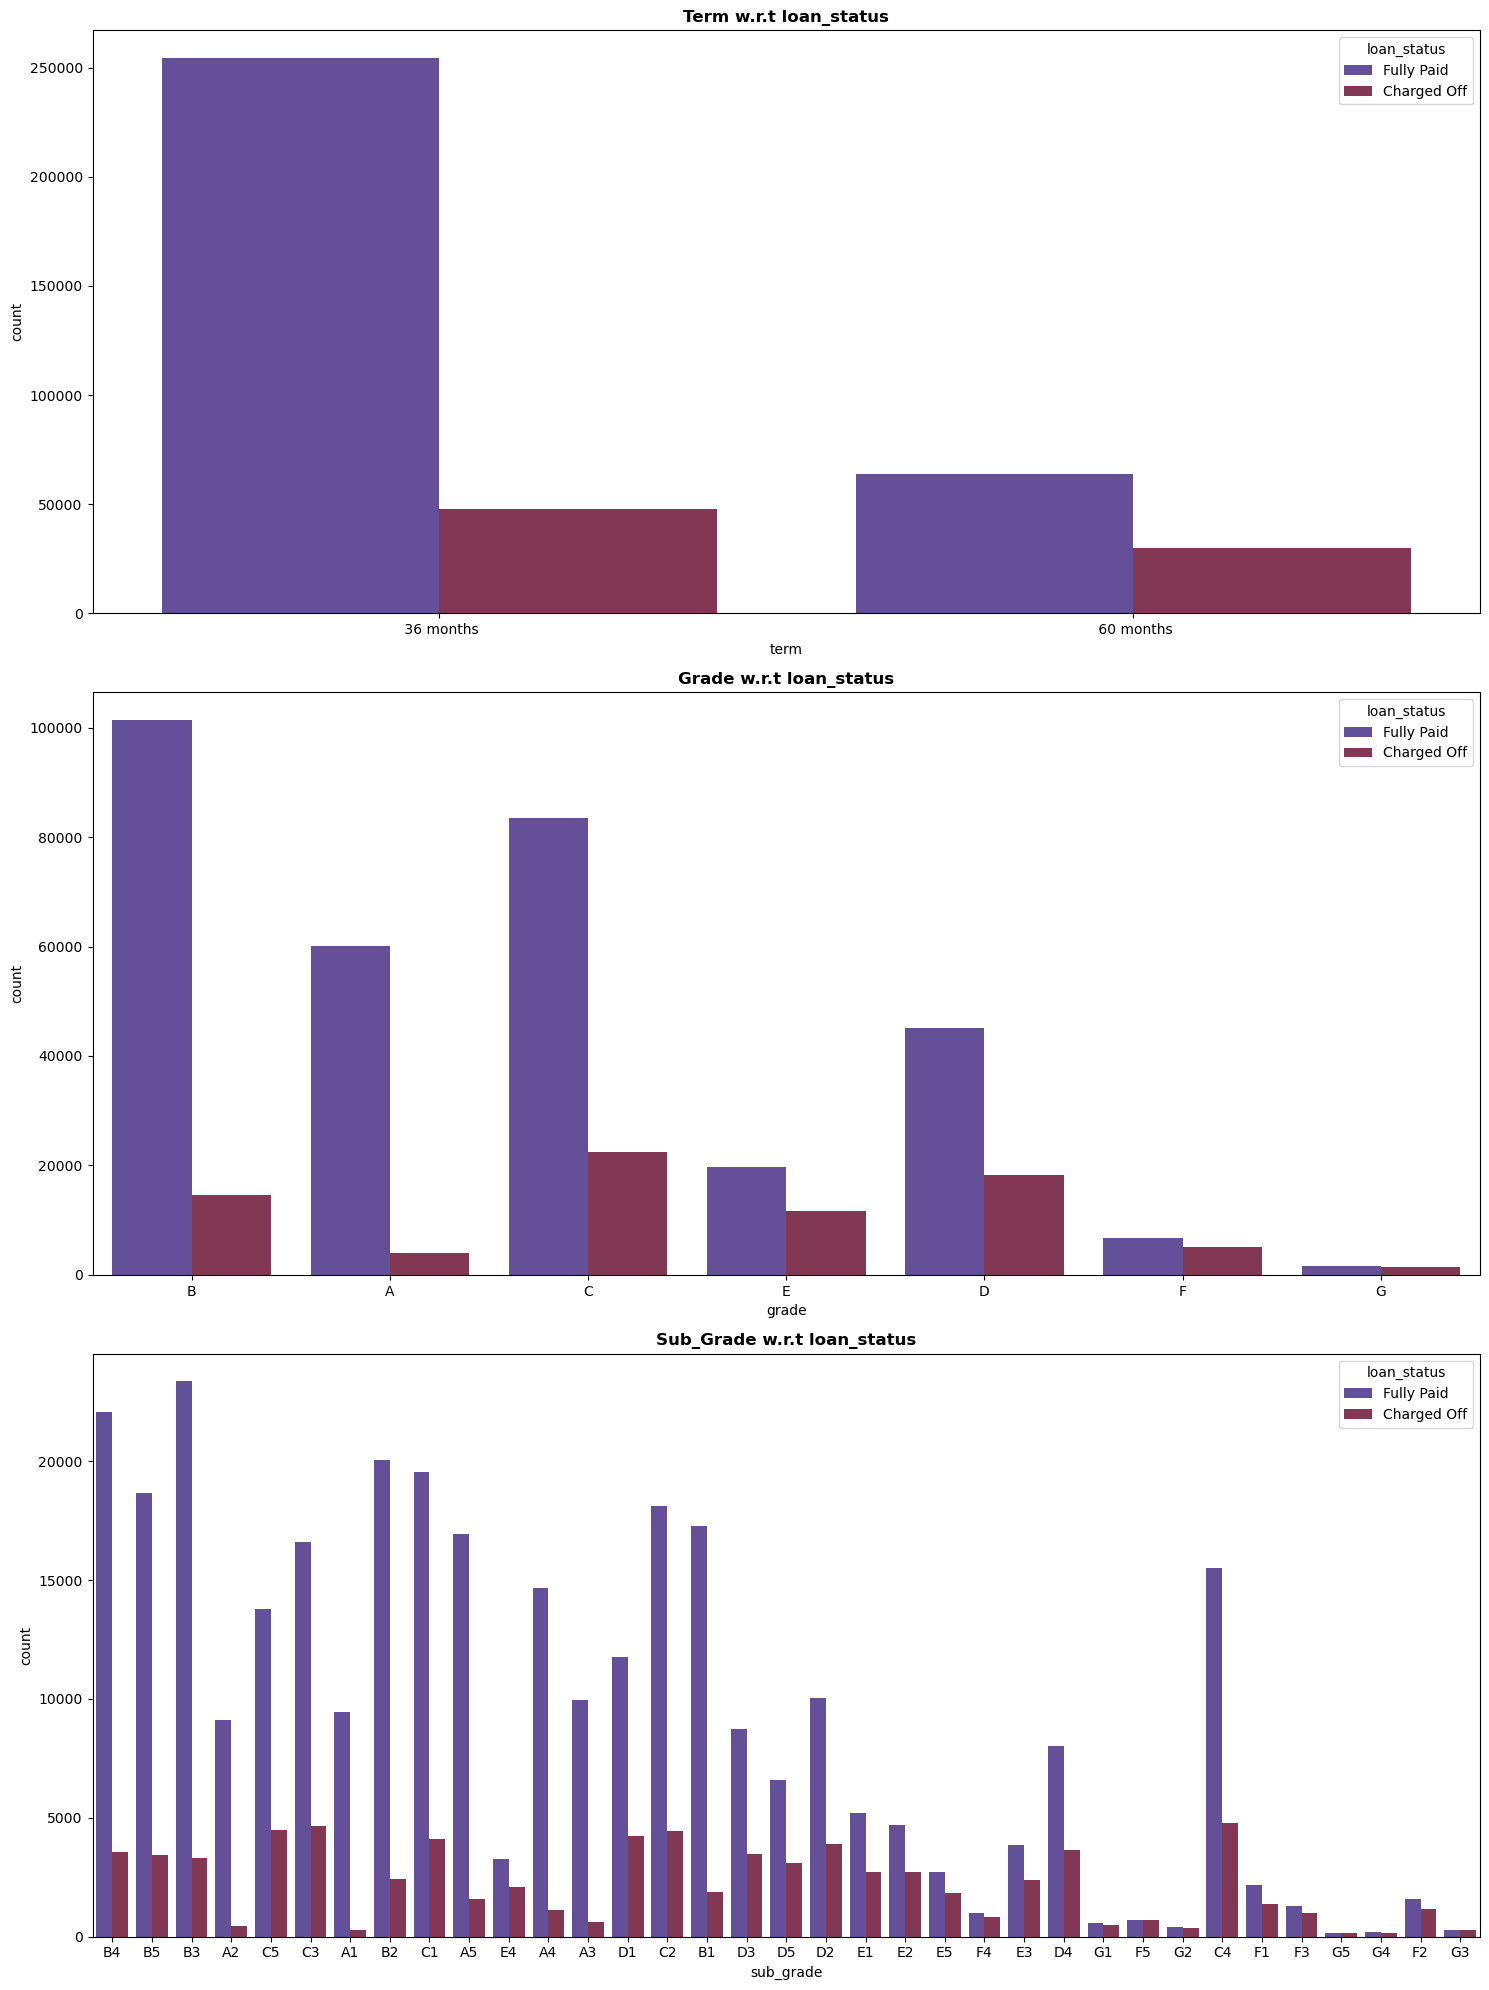

In [19]:
# Plotting count plot for categorical variables w.r.t loan status
cols=['term', 'grade', 'sub_grade']
plt.figure(figsize=(15,20),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(3,1,n)
    n+=1
    sns.countplot(x=df[i], hue=df['loan_status'] ,palette='twilight')
    plt.title(f'{i.title()} w.r.t loan_status',weight='bold')
    plt.tight_layout()

1. Number of defaulters for the term 60 months are less when compared to term 36 months so we can say that borrowers who took 60 months as repayment term are fully paid
2. Most of the loan disributed for Grade B then followed by Grade C and Grade A, in Grade B borrowers are fully paid the loan.
3. Grade C has more number of defaulters follwed by Grade D.
4. Garde A has Good record of Fully paid so considered as **Good**.
5. Grade F and G has been bad, we say that by seeing subgrade also.


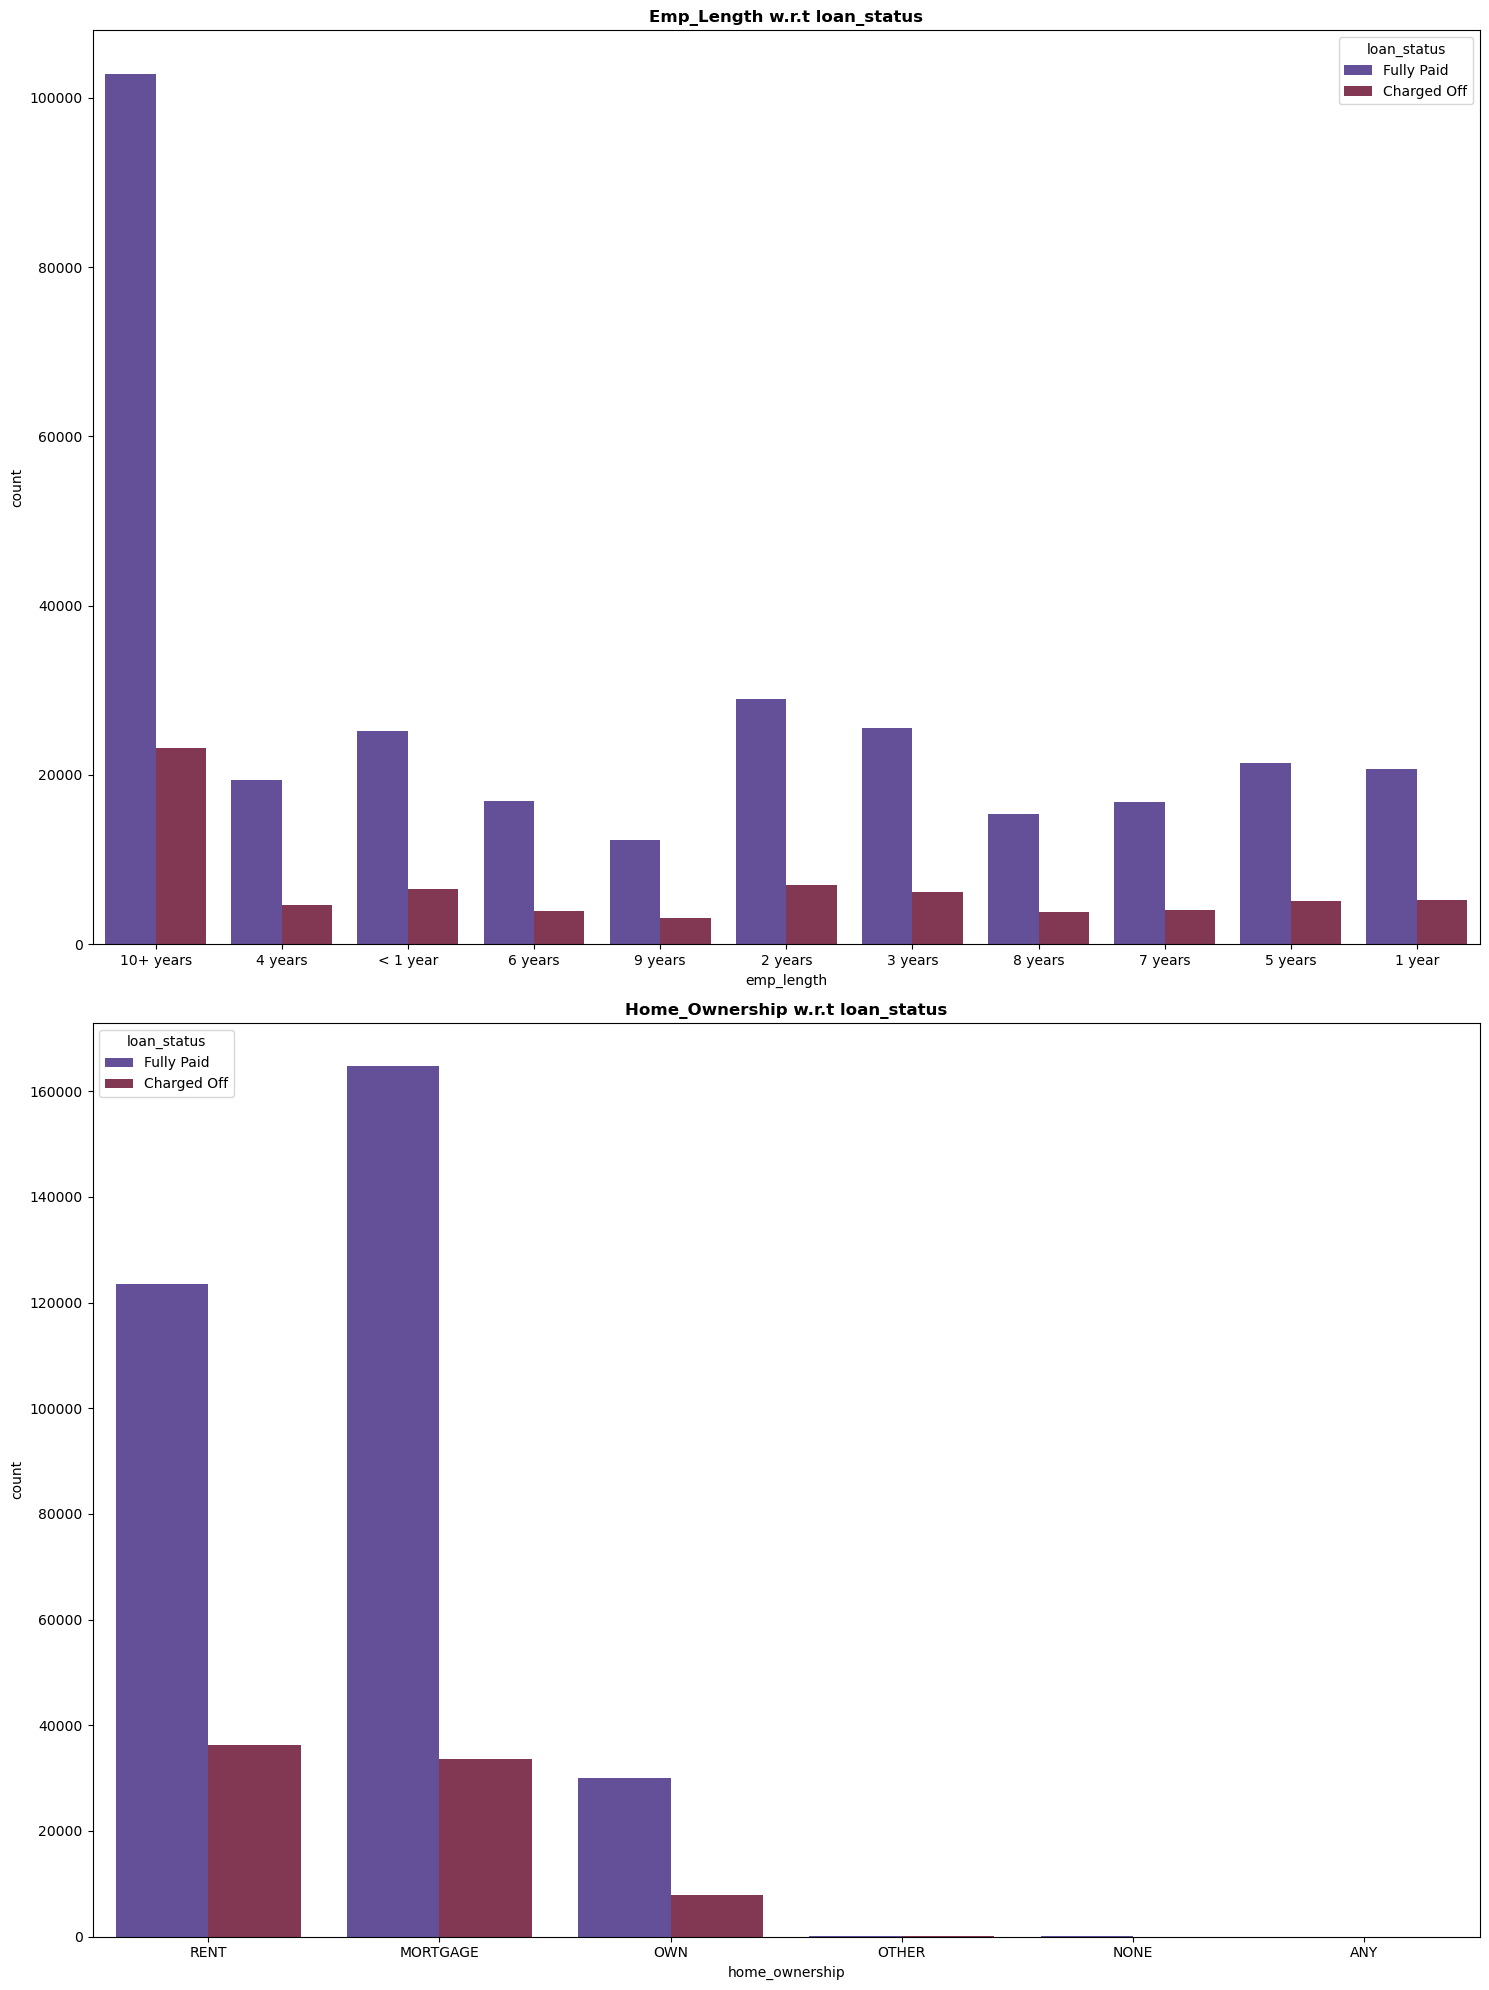

In [20]:
cols=['emp_length','home_ownership']
plt.figure(figsize=(15,20),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(2,1,n)
    n+=1
    sns.countplot(x=df[i], hue=df['loan_status'] ,palette='twilight')
    plt.title(f'{i.title()} w.r.t loan_status',weight='bold')
    plt.tight_layout()

1. Borrowers with emp_len > 10+ years have fully paid there loan and also more number of defaulters in this category,emp_length with 9 years has less number of defaulters
2. Borrowers who shows their home as mortage has fully paid there loan compared to all, borrowers having own house has less number of defaulters

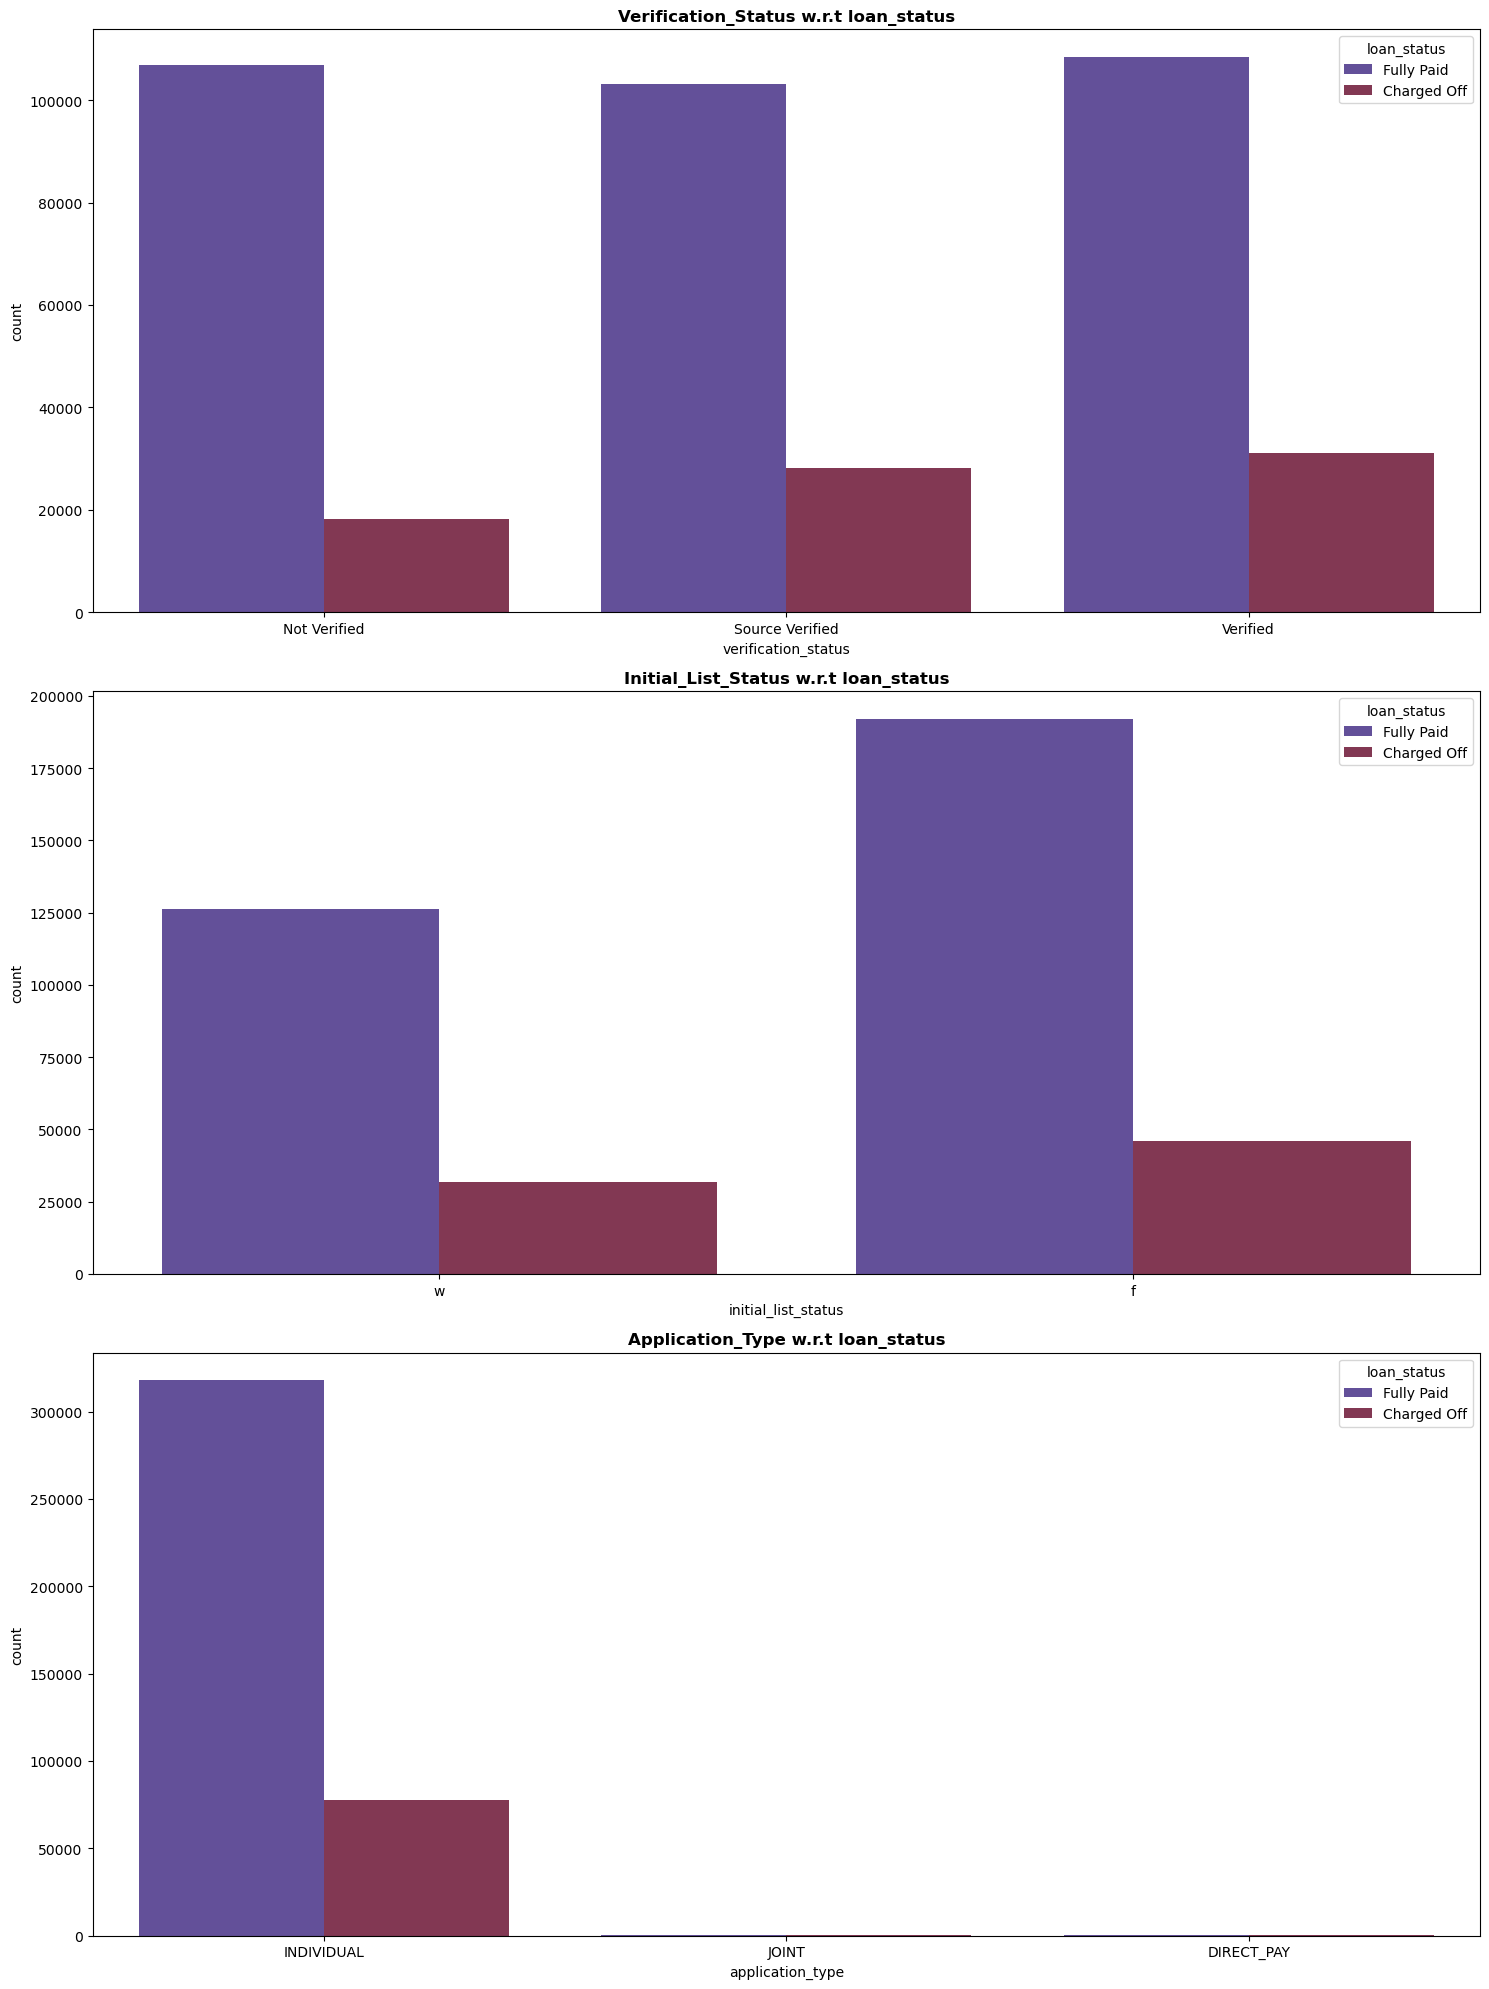

In [21]:
cols=['verification_status','initial_list_status','application_type']

plt.figure(figsize=(15,20),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(3,1,n)
    n+=1
    sns.countplot(x=df[i], hue=df['loan_status'] ,palette='twilight')
    plt.title(f'{i.title()} w.r.t loan_status',weight='bold')
    plt.tight_layout()

1. Borrowers who's account is verified has more number of defaulters
2. we have to do binning to issue_id

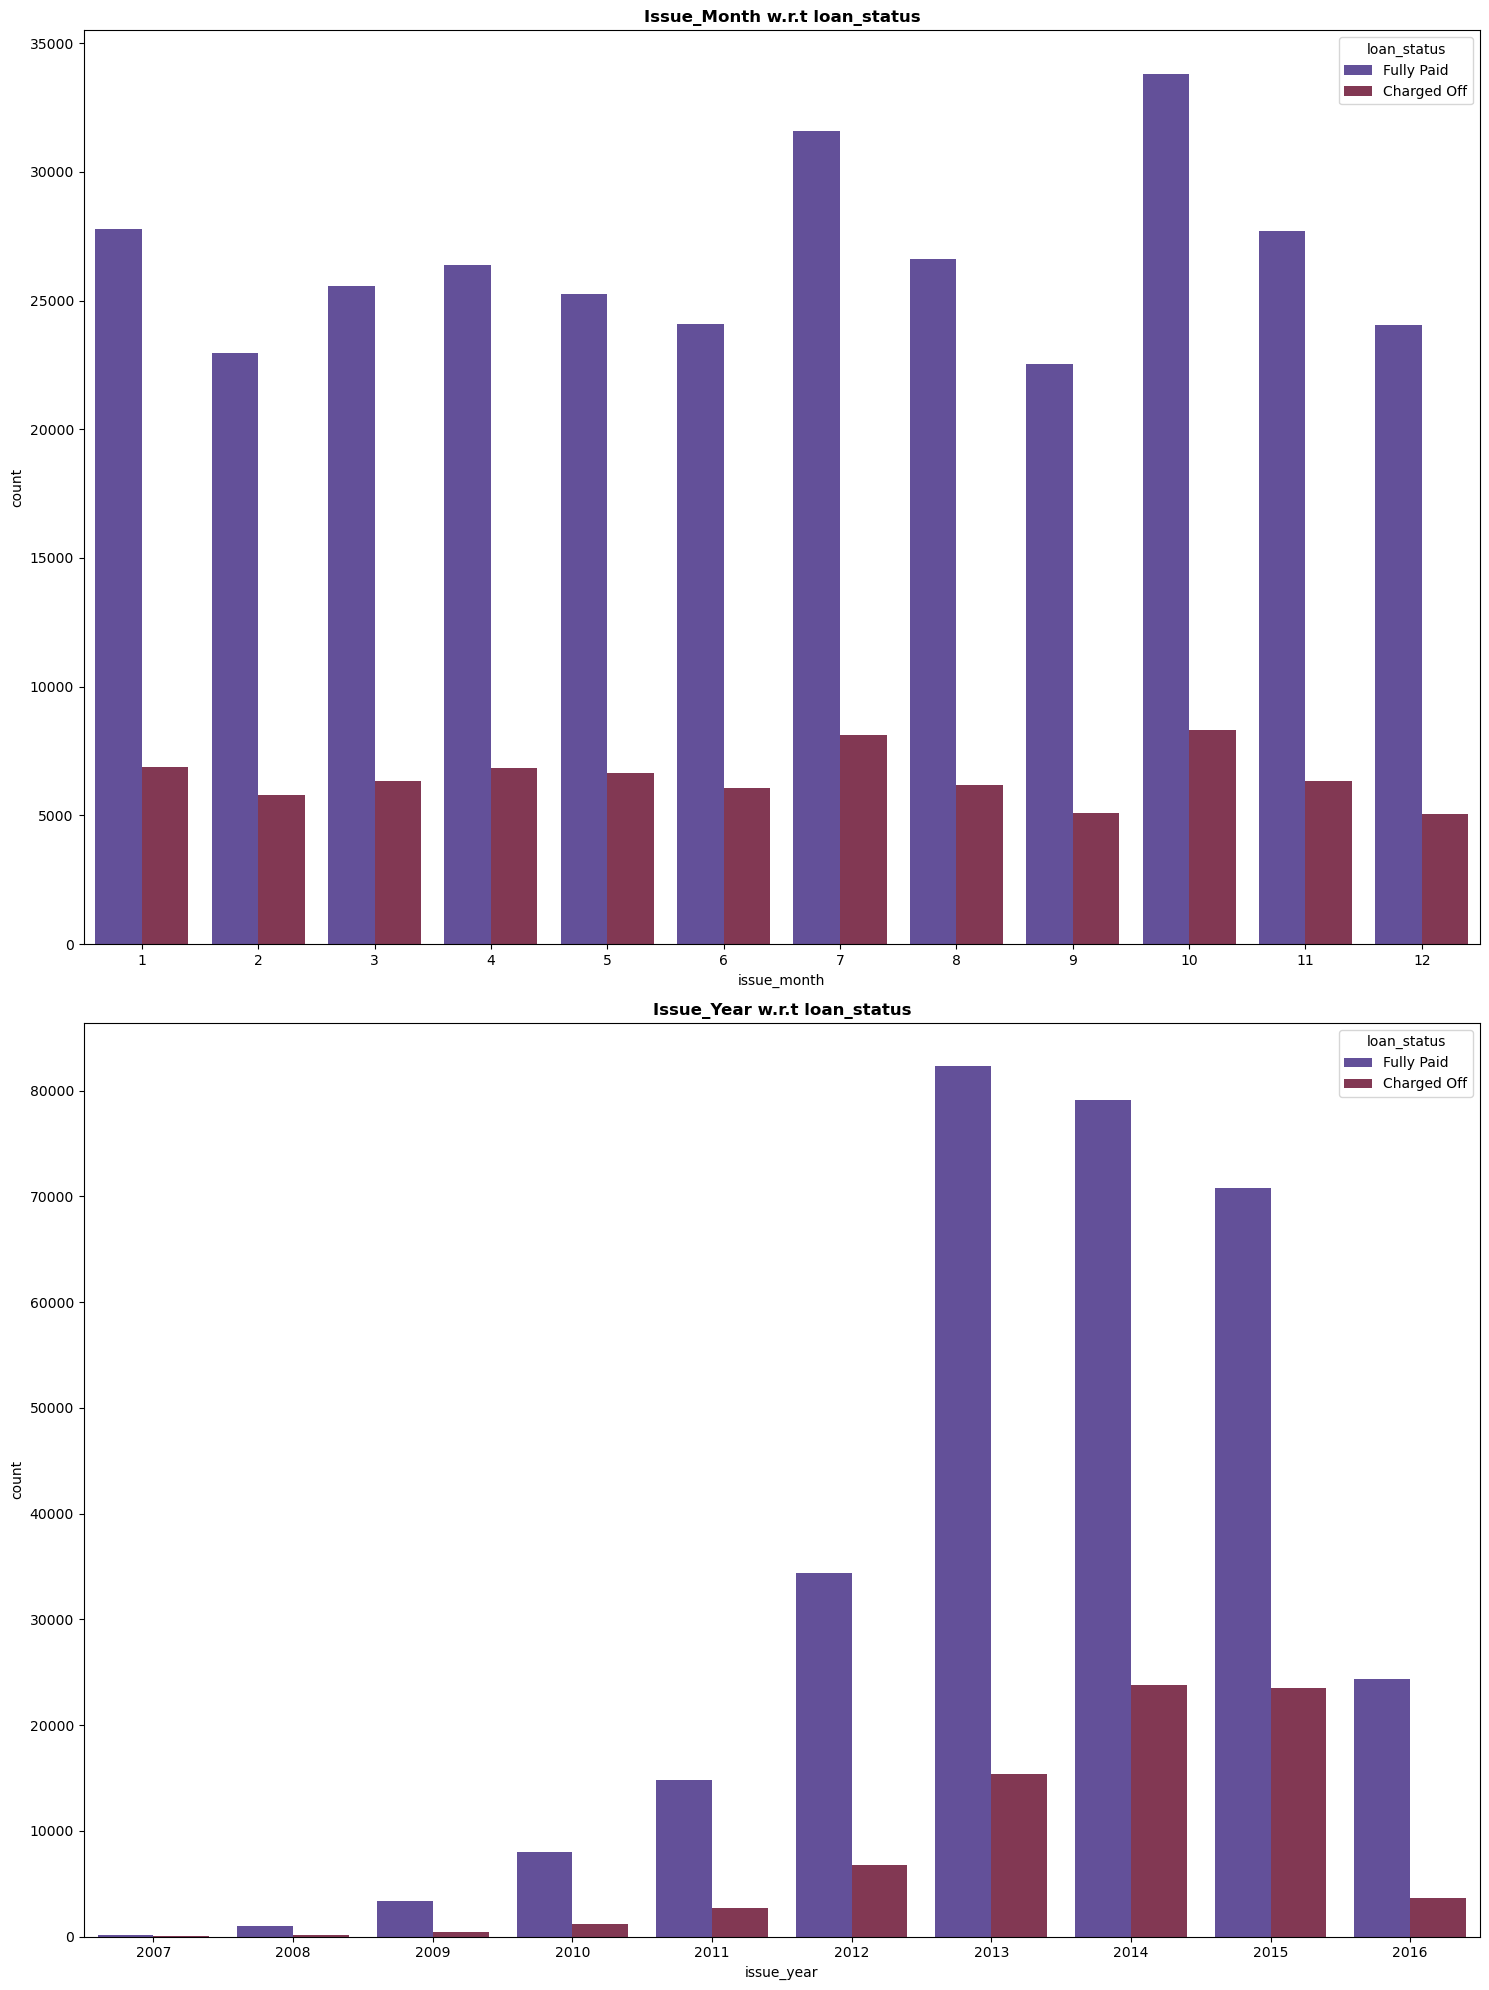

In [22]:
cols=['issue_month','issue_year']
plt.figure(figsize=(15,20),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(2,1,n)
    n+=1
    sns.countplot(x=df[i], hue=df['loan_status'] ,palette='twilight')
    plt.title(f'{i.title()} w.r.t loan_status',weight='bold')
    plt.tight_layout()

1. Borrowers who took loan in October month are fully paid  and has more number of defaulters compared to others followed by month july.
2. In year 2013 most of the borrowers are fully paid there loan, year 2014 and 2015 has more number of defaulters.

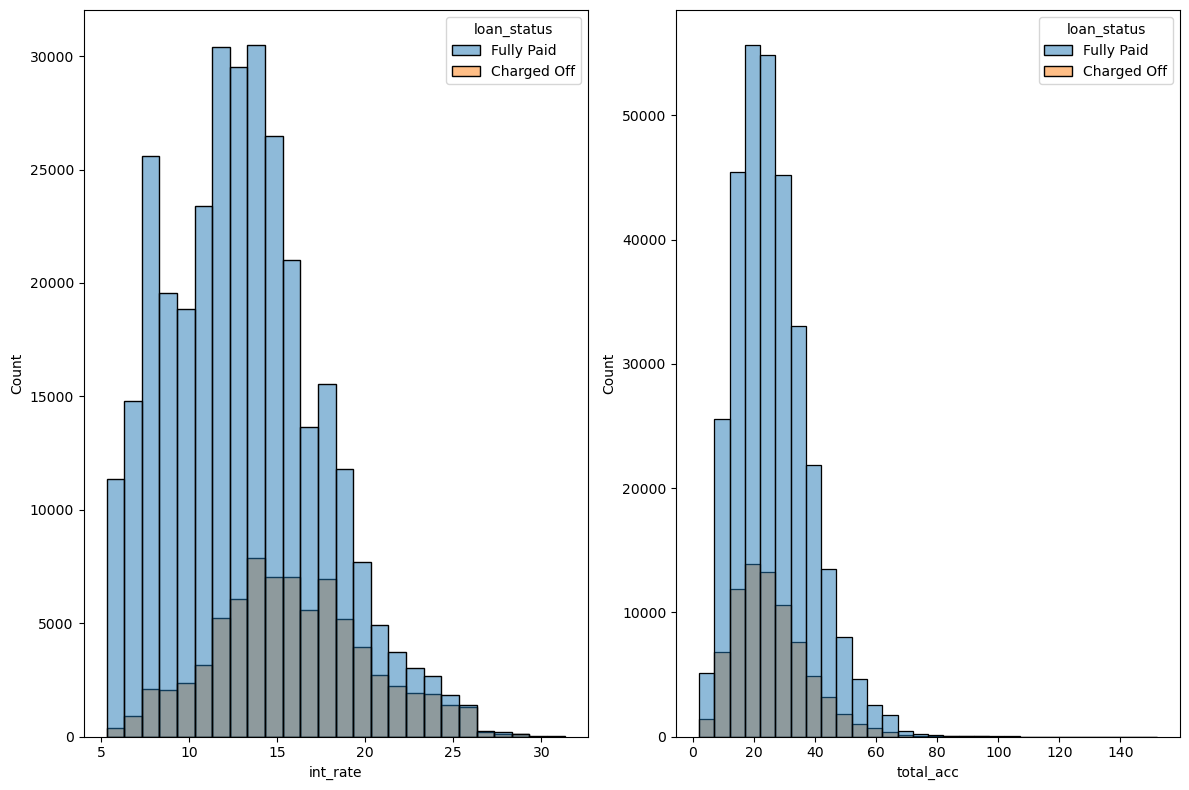

In [23]:
plt.figure(figsize=(12,8),dpi=100)
plt.subplot(1,2,1)
sns.histplot(x=df['int_rate'],hue=df['loan_status'],binwidth=1)
plt.subplot(1,2,2)
sns.histplot(x=df['total_acc'],hue=df['loan_status'],binwidth=5)
plt.tight_layout()


1. for interest rate 10% - 15 % most of the borrowers are Fully paid and also more number of defaulters lies in this range only.
2. for total_acc between 15 - 20 has fully paid there loan and defaulters are also more in this range
3. After 45 less defaulters are there

### Multivarient Analysis

In [24]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.115067,-0.020332,-0.147003,-0.147003
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.050386,-0.002053,0.108470,0.108470
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.103490,-0.023279,-0.131848,-0.131848
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.050033,-0.004875,-0.140456,-0.140456
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.074847,0.000059,-0.009479,-0.009479
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.137584,-0.009093,-0.123538,-0.123538
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,0.128452,-0.023474,-0.053268,-0.053268
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.034400,-0.002452,-0.199152,-0.199152
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.053086,-0.004213,-0.007452,-0.007452
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.111090,-0.007924,-0.278128,-0.278128


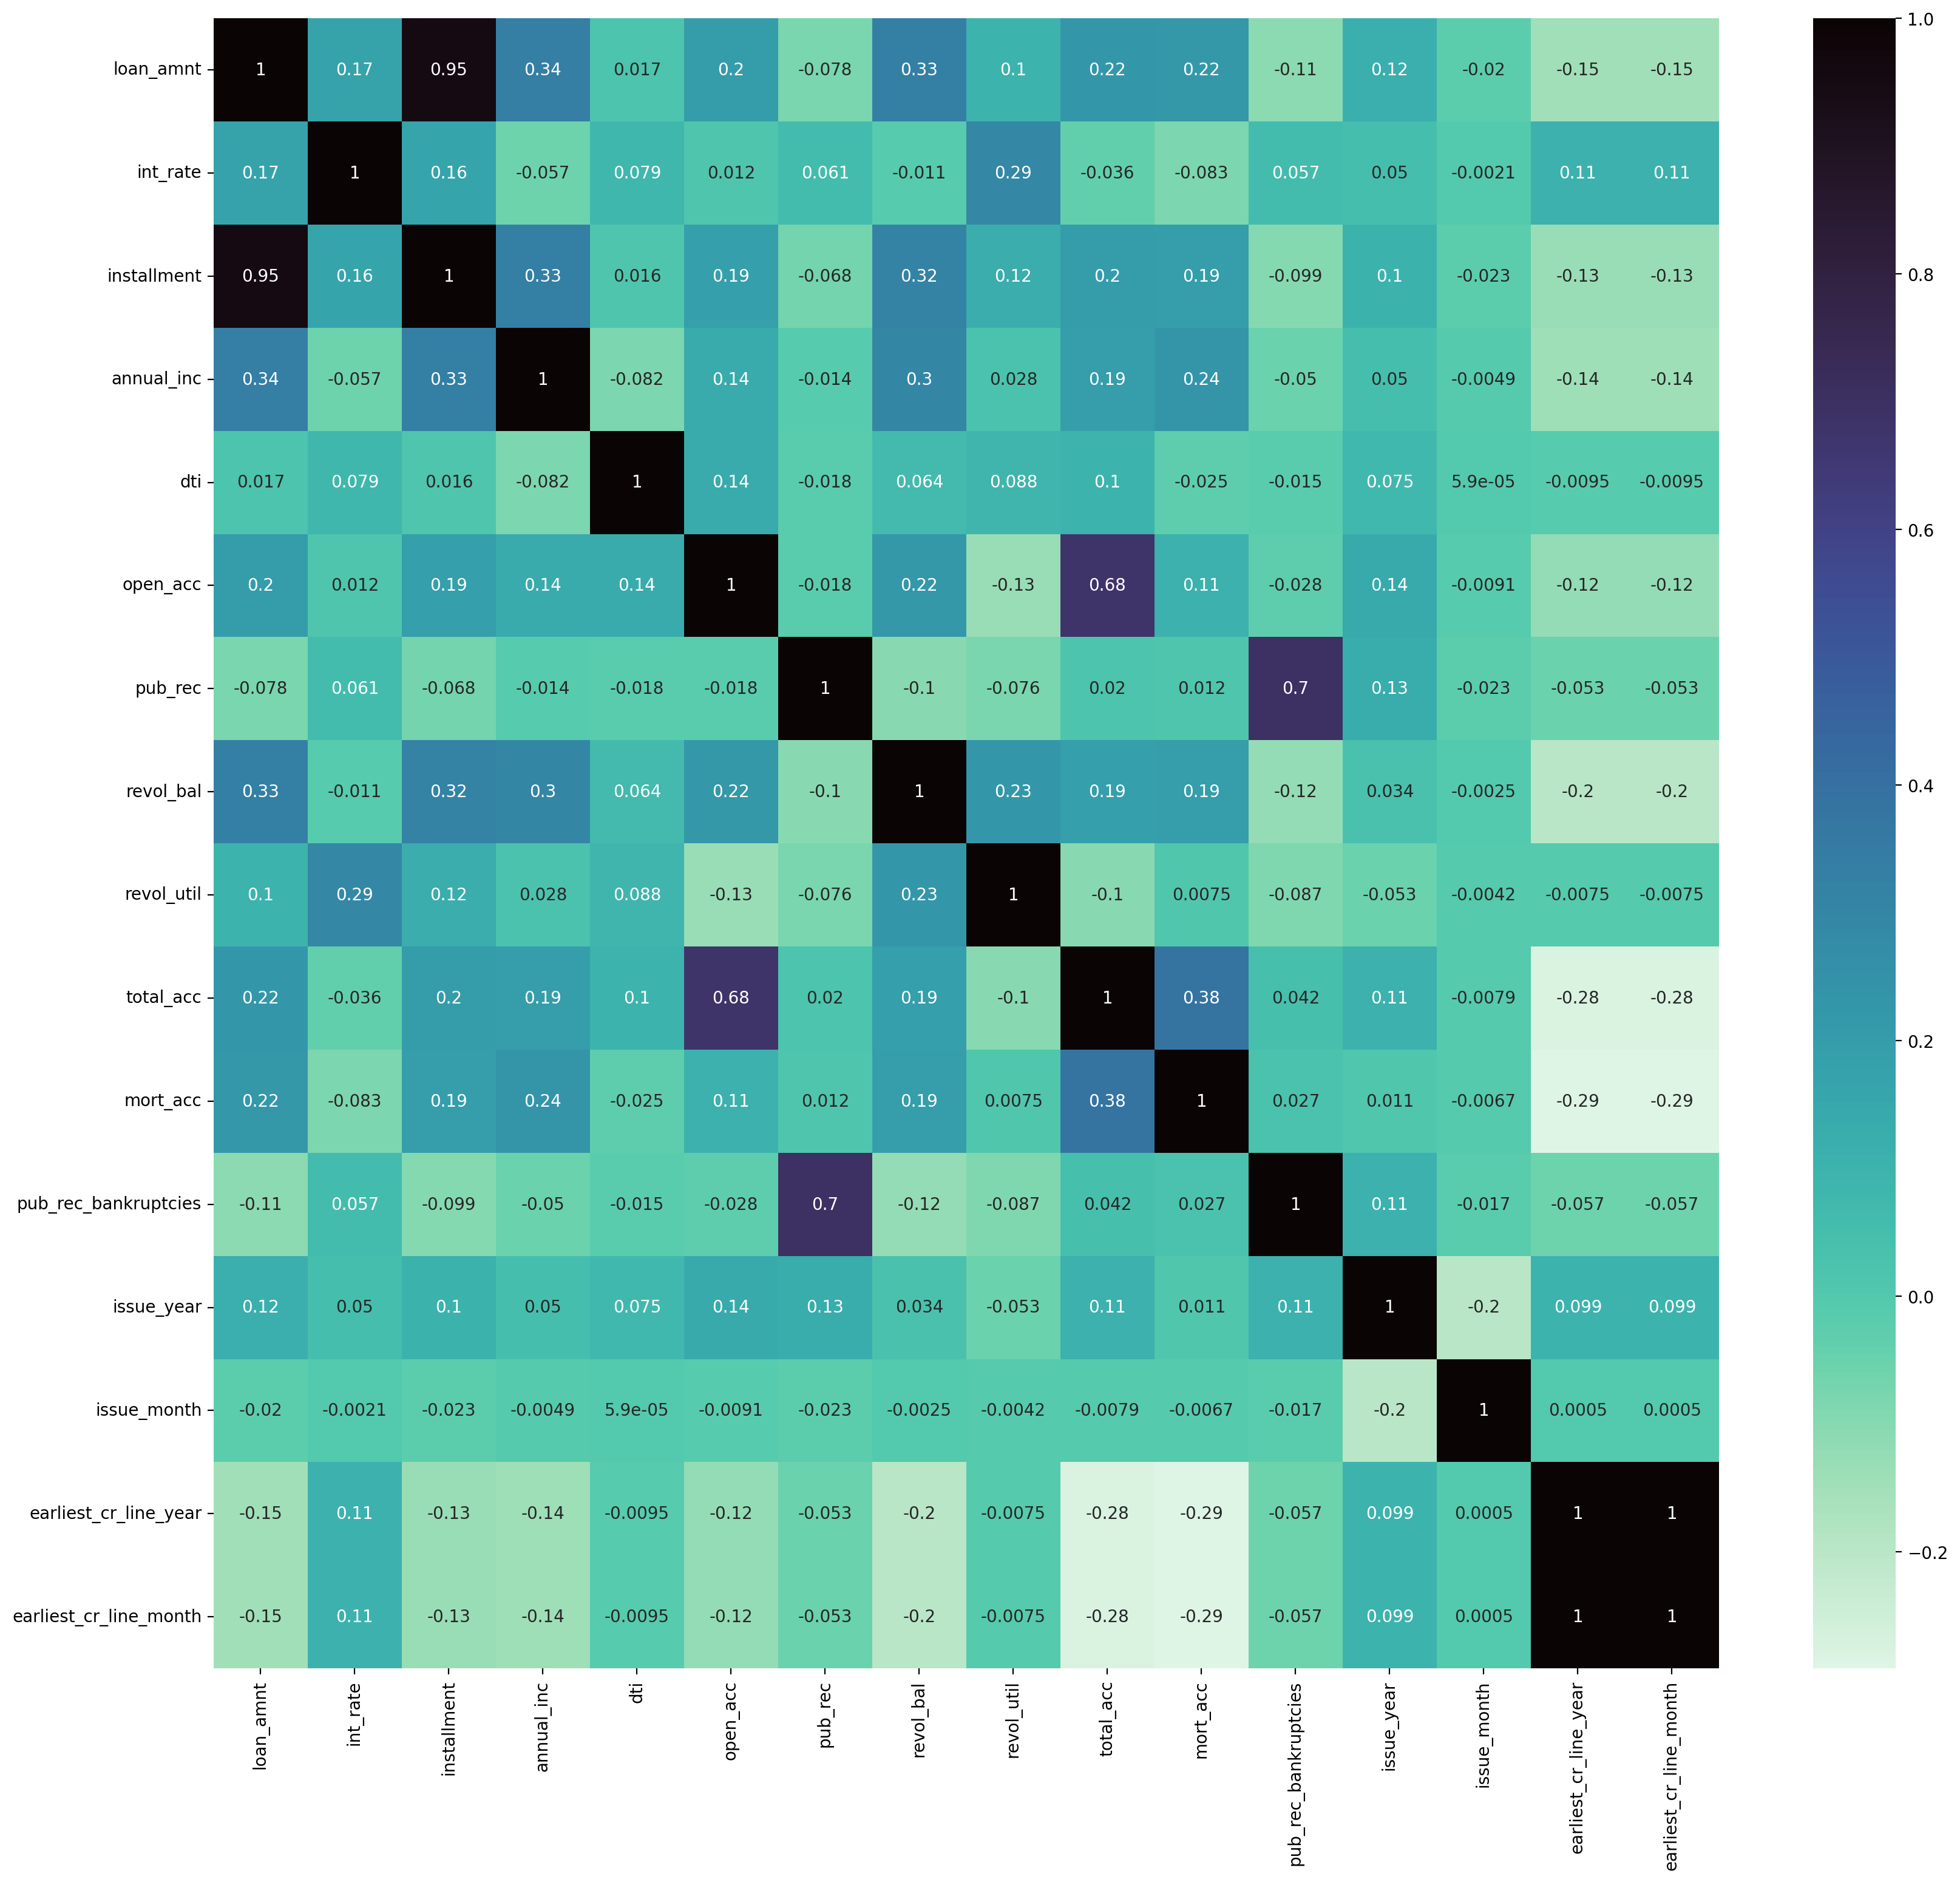

In [25]:
#plotting heatmap for checking the correlation between numerical variables i.e Multi-collinearity
plt.figure(figsize=(20,18),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='mako_r')
plt.show()

### Duplicate values

In [160]:
print(df.duplicated().sum())
print(' ')
print(f'Dataset have {df.duplicated().sum()} duplicate values.')

0
 
Dataset have 0 duplicate values.


# Statstical Analysis

# Chai - Square Test for Inpendence

# 𝐻0 : The variables are independent
# 𝐻1 : The variables are not independent (i.e. variables are dependent)

1. Here we are check if the catagorical features are dependent on our target.
2. We are assuming the level of confidence as 95%

In [161]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"


In [162]:
df_cat.shape

(396030, 13)

In [163]:
df_cat_fea=df_cat.drop('loan_status',axis=1)

In [164]:
df_tar=df_cat['loan_status']

In [165]:
for i in df_cat_fea.columns:
    tables=pd.crosstab(df_cat_fea[i],df_tar)
    obs_val=tables.values
    chi_sq_Stat, p_value, deg_freedom, ec = chi2_contingency(obs_val,correction=False)
    print('test statistic',chi_sq_Stat)
    print('P values',p_value)
    
    if p_value<0.05:
         print('We reject Null Hypothesis H0 and conclude that variable {} and loan status are dependent'.format(i))
    else:
         print('we fail to reject Hypothesis H0 and conclude that variable {} and loan status are independent'.format(i))

test statistic 11886.562618651451
P values 0.0
We reject Null Hypothesis H0 and conclude that variable term and loan status are dependent
test statistic 26338.05812796618
P values 0.0
We reject Null Hypothesis H0 and conclude that variable grade and loan status are dependent
test statistic 27560.204016877127
P values 0.0
We reject Null Hypothesis H0 and conclude that variable sub_grade and loan status are dependent
test statistic 175801.13349033557
P values 2.5403772017850467e-06
We reject Null Hypothesis H0 and conclude that variable emp_title and loan status are dependent
test statistic 122.11317384460878
P values 1.88404995201913e-21
We reject Null Hypothesis H0 and conclude that variable emp_length and loan status are dependent
test statistic 1860.6350953584301
P values 0.0
We reject Null Hypothesis H0 and conclude that variable home_ownership and loan status are dependent
test statistic 2903.0690673128847
P values 0.0
We reject Null Hypothesis H0 and conclude that variable verific

In [166]:
print('The dependent variable are')
print(' ')
for i in df_cat_fea.columns:
    tables=pd.crosstab(df_cat_fea[i],df_tar)
    obs_val=tables.values
    chi_sq_Stat, p_value, deg_freedom, ec = chi2_contingency(obs_val,correction=True)
  
    
    if p_value<0.05:
        print(i)

The dependent variable are
 
term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
purpose
initial_list_status
application_type


In [167]:
print('The  independent variable are')
print(' ')
for i in df_cat_fea.columns:
    tables=pd.crosstab(df_cat_fea[i],df_tar)
    obs_val=tables.values
    chi_sq_Stat, p_value, deg_freedom, ec = chi2_contingency(obs_val,correction=True)
  
    
    if p_value>0.05:
        print(i)
    

The  independent variable are
 
title
address


# The null and alternative hypothesis for t test independent is given as:

# 𝐻0 : The data samples are with equal median (independent).



# 𝐻1: The data samples do not have equal median(i.e. variables are dependent).

Assuming the level of confidence as 95%

In [168]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,2015,1,1990,1990
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,2015,1,2004,2004
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,2015,1,2007,2007
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,2014,11,2006,2006
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,2013,4,1999,1999


In [172]:
df_num.shape

(396030, 16)

In [169]:
from scipy.stats import kruskal

In [170]:
for i in df_num.columns:
    print('for: ',i)
    print('\nThe null and alternative hypothesis is:')
    print('H0: The variables {} and loan_status are independent'.format(i))
    print('H1: The variables {} and loan_status are not independent'.format(i))
    print('')
    Charged_Off_set=df[df['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df[df['loan_status']=='Fully Paid'][i]

    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)

    print("Test statistic:", test_stat)
    print("p-value:", p)
   
    if p > 0.05:
        print('The above output shows that the H-test p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables {} and loan_status are independent.'.format(i))
    else:
        print('The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables {} and loan_status are dependent.'.format(i)) 

for:  loan_amnt

The null and alternative hypothesis is:
H0: The variables loan_amnt and loan_status are independent
H1: The variables loan_amnt and loan_status are not independent

Test statistic: 1559.441461895931
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables loan_amnt and loan_status are dependent.
for:  int_rate

The null and alternative hypothesis is:
H0: The variables int_rate and loan_status are independent
H1: The variables int_rate and loan_status are not independent

Test statistic: 23684.80612332653
p-value: 0.0
The above output shows that the H-test p-value is lesser than 0.05, thus we  reject  the null hypothesis and conclude that the variables int_rate and loan_status are dependent.
for:  installment

The null and alternative hypothesis is:
H0: The variables installment and loan_status are independent
H1: The variables installment and loan_status are not independent

Te

In [171]:
print('The dependent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Charged_Off_set=df[df['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df[df['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    if p < 0.05:
        print(i)

The dependent numerical variable found after H-test Test:

loan_amnt
int_rate
installment
annual_inc
dti
open_acc
pub_rec
total_acc
issue_year
issue_month
earliest_cr_line_year
earliest_cr_line_month


In [173]:
print('The independent numerical variable found after H-test Test:')
print('')
for i in df_num.columns:
    Charged_Off_set=df[df['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df[df['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    if p > 0.05:
        print(i)

The independent numerical variable found after H-test Test:

revol_bal


In [174]:
#creating a datframe
significant_variable=pd.DataFrame(columns=['Feature','Statistical Test','P-Value','Inference'])
for i in df_num.columns:
    Charged_Off_set=df[df['loan_status']=='Charged Off'][i]
    Fully_Paid_set=df[df['loan_status']=='Fully Paid'][i]
    test_stat, p = kruskal(Charged_Off_set,Fully_Paid_set)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Dependent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'kruskal wallis test',
                          'P-Value':p,
                          'Inference':'Independent numerical variable found after H-test Test'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)

In [175]:
for i in df_cat.columns:
    table=pd.crosstab(df_cat[i],df_tar)
    observed_value=table.values
    
    
    test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
    
    if p < 0.05:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Dependent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
    else:
        seg_ser=pd.Series({'Feature': i,
                          'Statistical Test':'Chi-Square Test for Independence',
                          'P-Value':p,
                          'Inference':'Independent categorical variable found after Chi-Square Test for Independence'})
        significant_variable = significant_variable.append(seg_ser, ignore_index=True)
        
significant_variable      

,Feature,Statistical Test,P-Value,Inference
0,loan_amnt,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
1,int_rate,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
2,installment,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
3,annual_inc,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
4,dti,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
5,open_acc,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
6,pub_rec,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...
7,revol_bal,kruskal wallis test,0.092806,Independent numerical variable found after H-t...
8,revol_util,kruskal wallis test,NaN,Independent numerical variable found after H-t...
9,total_acc,kruskal wallis test,0.0,Dependent numerical variable found after H-tes...


# Misssing value treatment

In [176]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                 22927
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                      1755
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
address                       0
issue_year                    0
issue_month                   0
earliest_cr_line_year         0
earliest_cr_line_month        0
dtype: int64

In [177]:
(df.isnull().sum())*100/len(df)

loan_amnt                 0.000000
term                      0.000000
int_rate                  0.000000
installment               0.000000
grade                     0.000000
sub_grade                 0.000000
emp_title                 5.789208
emp_length                4.621115
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
loan_status               0.000000
purpose                   0.000000
title                     0.443148
dti                       0.000000
open_acc                  0.000000
pub_rec                   0.000000
revol_bal                 0.000000
revol_util                0.069692
total_acc                 0.000000
initial_list_status       0.000000
application_type          0.000000
mort_acc                  9.543469
pub_rec_bankruptcies      0.135091
address                   0.000000
issue_year                0.000000
issue_month               0.000000
earliest_cr_line_year     0.000000
earliest_cr_line_mon

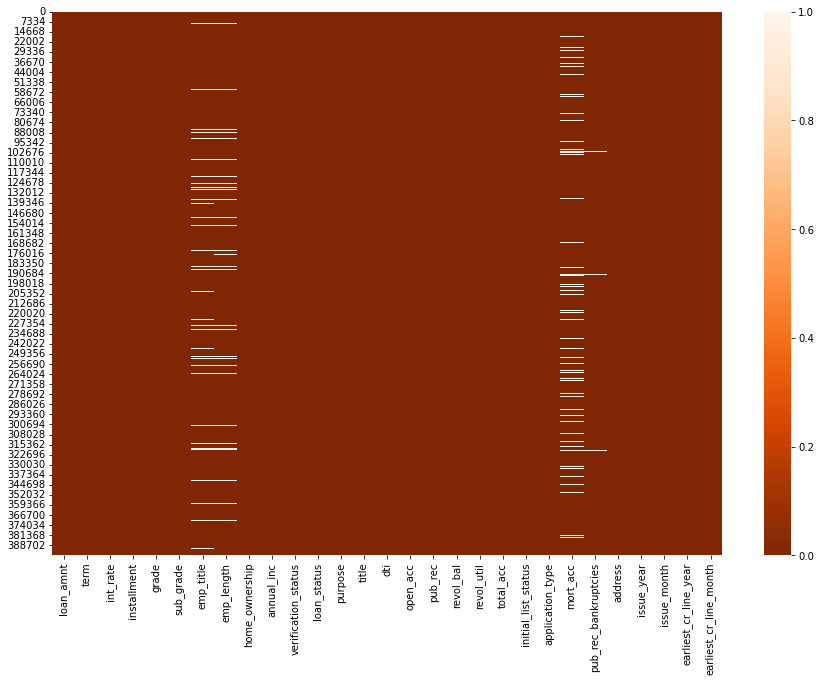

In [35]:
#plotting Heatmap to visualize missing Values
sns.heatmap(df.isna() ,cmap='Oranges_r')
plt.show()

1. mort_acc has higest percentage of null values followed by emp_title and emp_length


# Dealing with emp_title

In [36]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
df['emp_title'].nunique()

173105

In [38]:
df['emp_title'].head()

0                  Marketing
1            Credit analyst 
2               Statistician
3            Client Advocate
4    Destiny Management Inc.
Name: emp_title, dtype: object

In [39]:
df['emp_title'].mode()

0    Teacher
Name: emp_title, dtype: object

In [178]:
df=df.drop('emp_title',axis=1)

There are 173105 unique job titles out there. We should drop the column in its entirety as there is just too much work for our prediction model.

# Dealing with emp_length

In [41]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [42]:
df['emp_length'].head()

0    10+ years
1      4 years
2     < 1 year
3      6 years
4      9 years
Name: emp_length, dtype: object

In [43]:
# 10+ years is highest so we can fill 10+ years for null values

<AxesSubplot:xlabel='emp_length', ylabel='count'>

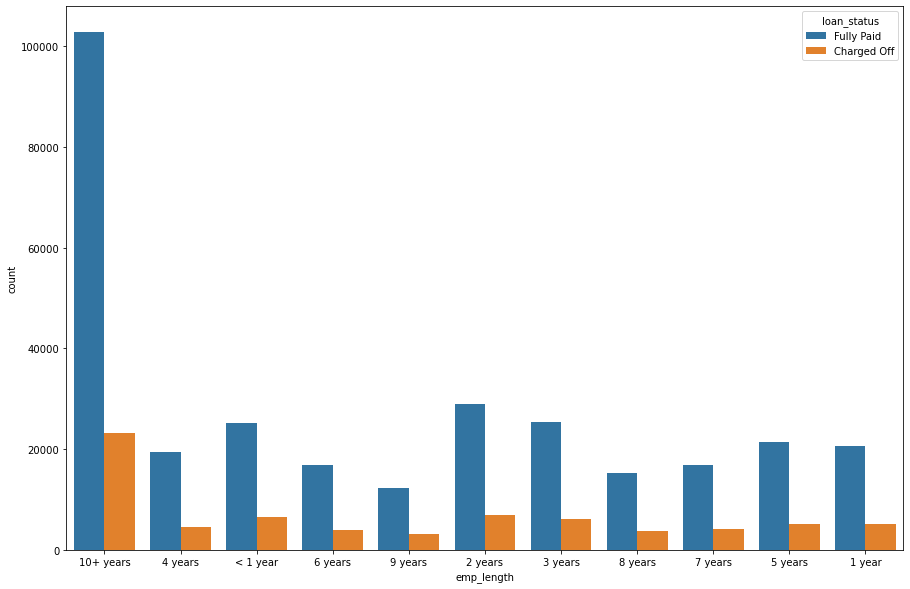

In [44]:
sns.countplot(x=df['emp_length'],hue=df['loan_status'])

Customers's majoritly working for 10+ years.

<AxesSubplot:xlabel='emp_length'>

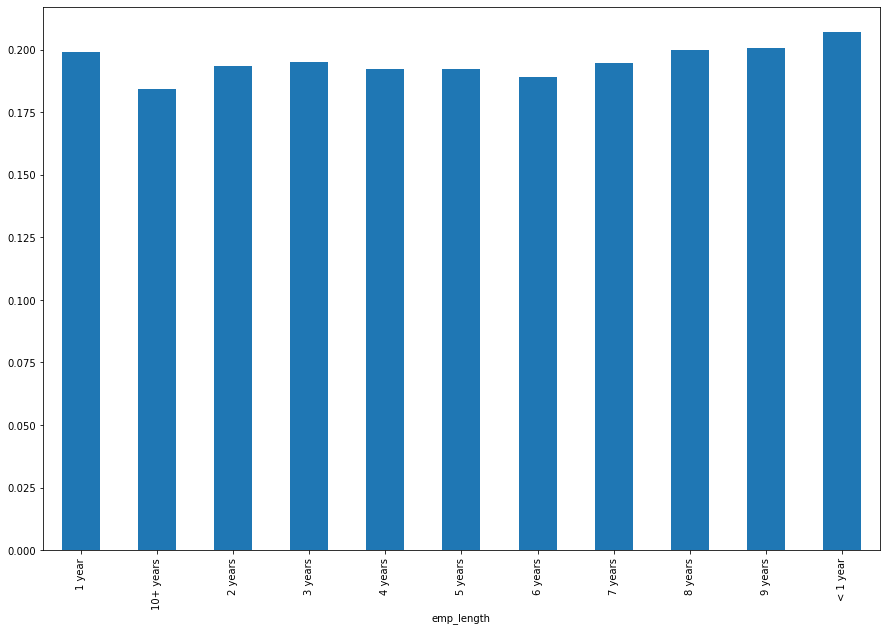

In [45]:
emp_charged_of=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fully_paid=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_charged_of_ratio=emp_charged_of/(emp_charged_of+emp_fully_paid)
emp_charged_of_ratio.plot(kind='bar')

from this we can say that all employee lengths ratio are same we can drop this columns also it has not more effect on target variable


In [46]:
df['emp_length'].mode()[0]

'10+ years'

In [47]:
df['emp_length'].fillna('10+ years',inplace=True)

In [179]:
df=df.drop('emp_length',axis=1)

In [180]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                      1755
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
address                       0
issue_year                    0
issue_month                   0
earliest_cr_line_year         0
earliest_cr_line_month        0
dtype: int64

# Dealing with mort_acc

In [50]:
df['mort_acc'].dtype

dtype('float64')

In [51]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [52]:
df['mort_acc'].isnull().sum()

37795

In [181]:
df['mort_acc'].fillna(df['mort_acc'].median(),inplace=True)

In [182]:
df['mort_acc'].isnull().sum()

0

In [34]:
df['mort_acc'].dtype

dtype('float64')

# Dealing with revol_util

In [56]:
df['revol_util'].value_counts()

0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [35]:
df['revol_util'].isnull().sum()

276

In [183]:
df['revol_util'].fillna(df['revol_util'].median(),inplace=True)

In [184]:
df['revol_util'].isnull().sum()

0

# Dealing with pub_rec_bankruptcies

In [38]:
df['pub_rec_bankruptcies'].isnull().sum()

535

In [185]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

In [186]:
df['pub_rec_bankruptcies'].isnull().sum()

0

# Dealing with title

In [41]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [42]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [65]:
print(df['title'].head(10))
print()
print('------')
print(df['purpose'].head(10))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

------
0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object


From above we can say that title and purpose have same data so we can drop any one of this column

In [187]:
df=df.drop('title',axis=1)

In [188]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
issue_year                0
issue_month               0
earliest_cr_line_year     0
earliest_cr_line_month    0
dtype: int64

In [68]:
df.shape

(396030, 26)

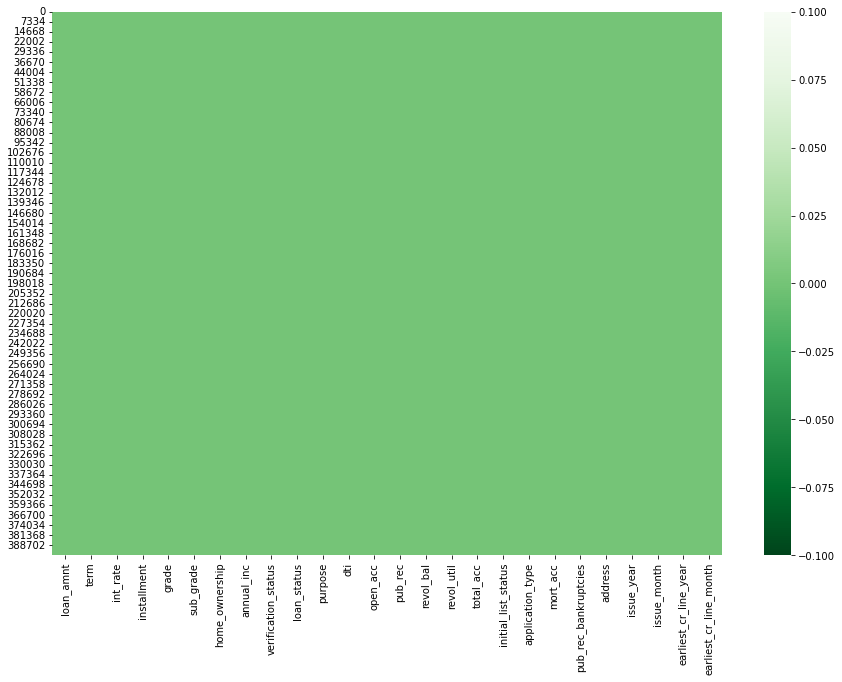

In [69]:
sns.heatmap(df.isna(),cmap='Greens_r')
plt.show()

In [189]:
df.shape

(396030, 26)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  object 
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  object 
 5   sub_grade               396030 non-null  object 
 6   home_ownership          396030 non-null  object 
 7   annual_inc              396030 non-null  float64
 8   verification_status     396030 non-null  object 
 9   loan_status             396030 non-null  object 
 10  purpose                 396030 non-null  object 
 11  dti                     396030 non-null  float64
 12  open_acc                396030 non-null  float64
 13  pub_rec                 396030 non-null  float64
 14  revol_bal           

# checking insignificant data points in annual income

In [191]:
df[df['annual_inc'] <=0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month
285674,3700.0,36 months,12.59,123.94,C,C2,MORTGAGE,0.0,Not Verified,Charged Off,...,20.0,f,JOINT,1.0,0.0,"033 Clark Mountains\r\nBrownfurt, MA 30723",2015,11,1978,1978


In [192]:
x=df[df['annual_inc']<=0].index
df.drop(index=x,inplace=True)
print(f'\n{len(x)} annual_income with value less than or equal to zero dropped')


1 annual_income with value less than or equal to zero dropped


annual_income cannot be zero , for loan eligibility annual_income is reqiured, as loan for annual income has disbursed, so we have dropped zero annual income

# Outlier Analysis and Treatment

 By Visualizing above boxplot we can see that all the Features have potential outliers and i some features there are extreme values as well.

In [ ]:
# as there are so many outliers present we use transformation for outlier analysis

here we are dropping time series columns

In [193]:
df=df.drop(columns=['issue_year','issue_month','earliest_cr_line_year','earliest_cr_line_month'],axis=1)

In [194]:
df.select_dtypes(include=np.number).head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


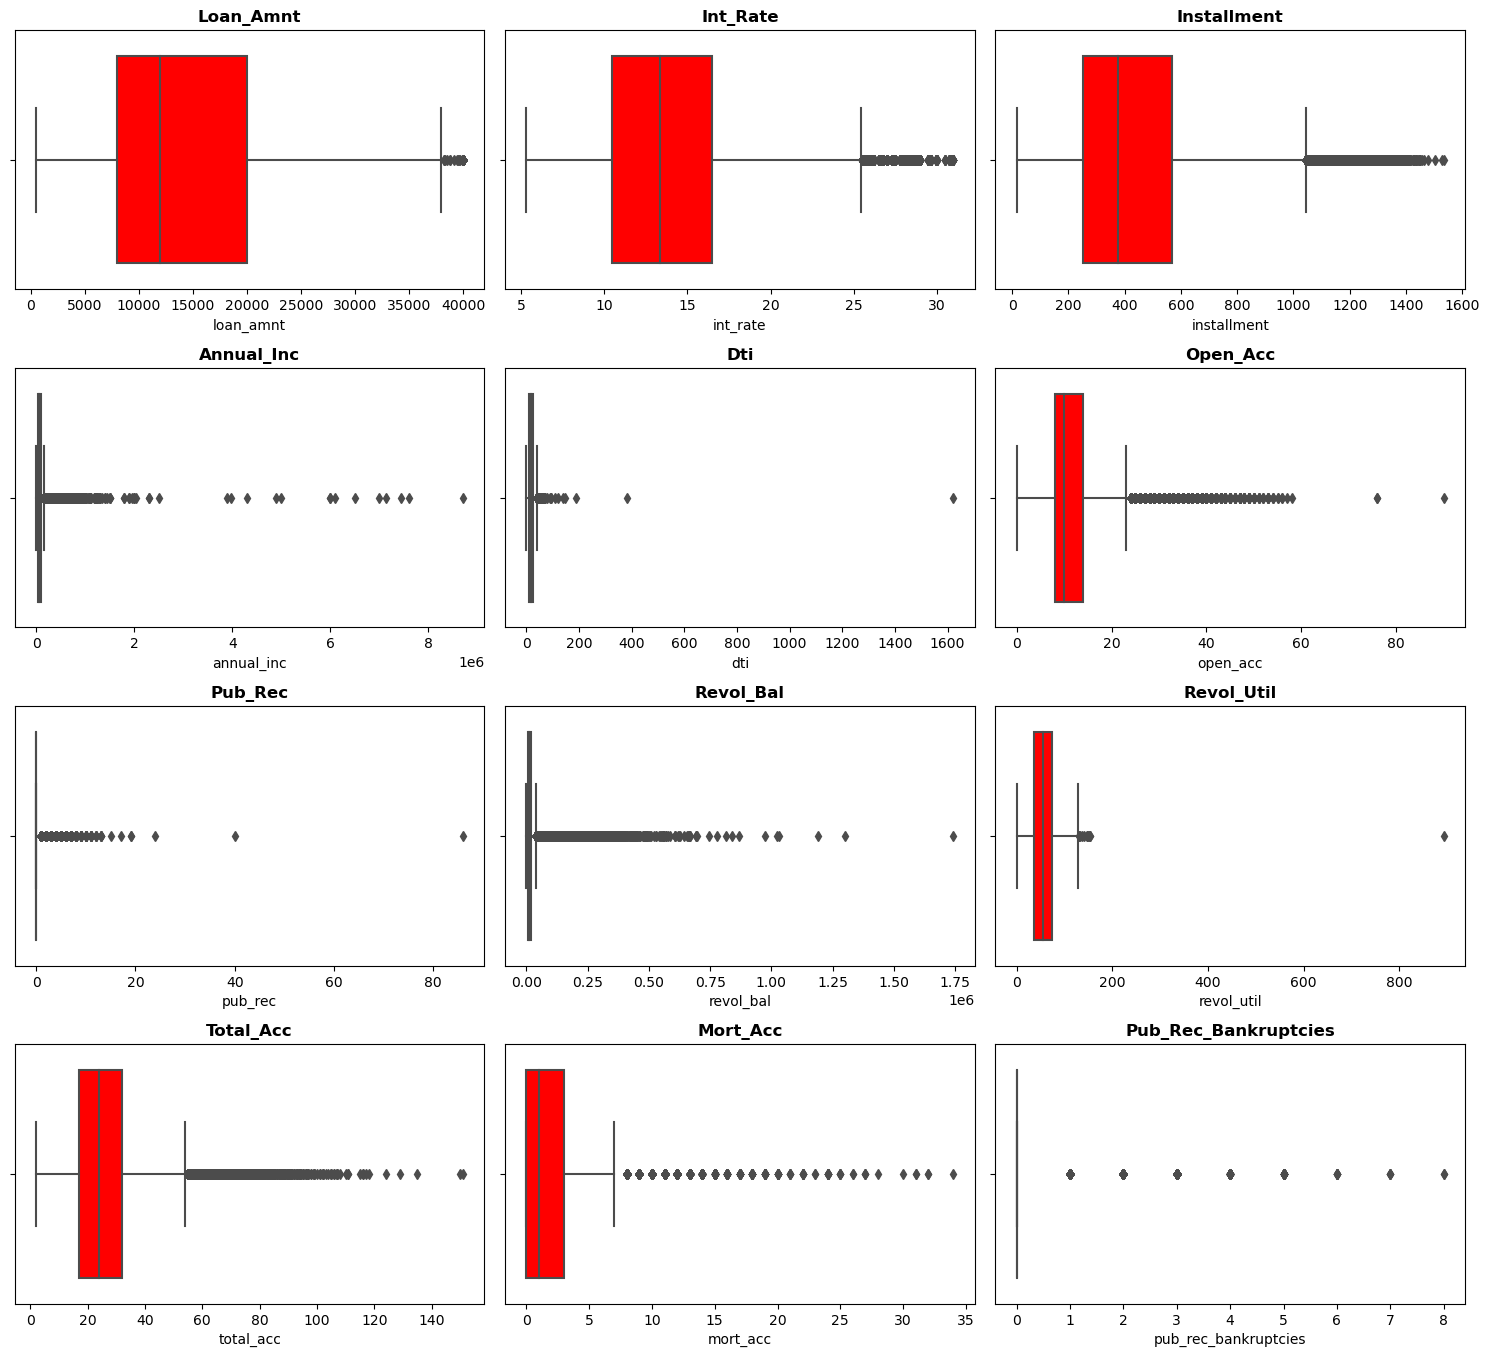

In [76]:
#checking for outliers by visualisizing boxplot
plt.figure(figsize=(15,20),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(6,3,n)
    n+=1
    sns.boxplot(df[i],color='red',saturation=2)
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

By Visualizing above boxplot we can see that all the Features have potential outliers and i some features there are extreme values as well.

In [195]:
df.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [196]:
numerical_cols=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies']

In [197]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 -q1

df1 = df[~((df<q1-3*iqr) | (df>q3+3*iqr)).any(axis = 1)]
df1 = df1.reset_index(drop = True)

In [198]:
df1.shape

(325733, 22)

In [199]:
df.shape

(396029, 22)

In [200]:
df.shape[0]-df1.shape[0]

70296

# Feature Engineering

In [201]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [38]:
df1['address'].unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [39]:
# here we can extract only zip codes and drop address columns

In [202]:
df1['zip_code']=df1.address.apply(lambda x: x[-5:])
df1['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
325728    30723
325729    05113
325730    70466
325731    29597
325732    48052
Name: zip_code, Length: 325733, dtype: object

In [51]:
df1.zip_code.value_counts()

70466    46917
30723    46526
22690    46487
48052    46153
00813    37694
29597    37426
05113    37353
11650     9145
93700     9045
86630     8987
Name: zip_code, dtype: int64

In [203]:
df1=df1.drop('address',axis=1)

In [204]:
df1['pub_rec'].value_counts()

0.0    325733
Name: pub_rec, dtype: int64

In [205]:
df1['mort_acc'].value_counts()

0.0     119609
1.0      83142
2.0      39092
3.0      29718
4.0      21792
5.0      14221
6.0       8702
7.0       4699
8.0       2352
9.0       1262
10.0       640
11.0       337
12.0       167
Name: mort_acc, dtype: int64

In [206]:
df1['pub_rec_bankruptcies'].value_counts()

0.0    325733
Name: pub_rec_bankruptcies, dtype: int64

In [207]:
df1=df1.drop('zip_code',axis=1)

In [208]:
def pub_rec(number):
    if number==0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number==0:
        return 0
    elif number >= 1:
        return 1
    else:
        return number
    
def pub_rec_bankrupticies(number):
    if number==0:
        return 0
    elif number >= 1:
        return 1
    else:
        return number

In [209]:
df1['pub_rec']=df1['pub_rec'].map(pub_rec)
df1['mort_acc']=df1['mort_acc'].map(mort_acc)


In [210]:
df1['pub_rec_bankruptcies']=df1['pub_rec_bankruptcies'].map(pub_rec_bankrupticies)

In [211]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,...,26.24,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,...,22.05,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,...,12.79,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,...,2.60,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,...,33.95,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0


In [212]:
df1=df1.drop('sub_grade',axis=1)

We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [213]:
df1['home_ownership'].value_counts()

MORTGAGE    160325
RENT        134620
OWN          30647
OTHER          107
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Here we are replacing NONE and ANY with OTHER

In [214]:
df1['home_ownership']=df1['home_ownership'].replace(['NONE','ANY','OTHER'],'OTHERS')

In [215]:
df1['home_ownership'].value_counts()

MORTGAGE    160325
RENT        134620
OWN          30647
OTHERS         141
Name: home_ownership, dtype: int64

In [216]:
df1['annual_inc'].value_counts()

60000.00     12864
50000.00     11211
65000.00      9402
70000.00      8999
40000.00      8903
             ...  
39814.00         1
117770.00        1
97129.00         1
62353.00         1
31789.88         1
Name: annual_inc, Length: 23036, dtype: int64

In [217]:
df1['annual_inc'].min()

4000.0

In [218]:
def annual_income(x):
    if x>=100000:
        return 'High paid job'
    else:
        return 'Low paid job'

In [219]:
df1['job_title']=df1['annual_inc'].apply(annual_income)

In [220]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,job_title
0,10000.0,36 months,11.44,329.48,B,RENT,117000.0,Not Verified,Fully Paid,vacation,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,High paid job
1,8000.0,36 months,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,Low paid job
2,15600.0,36 months,10.49,506.97,B,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,Low paid job
3,7200.0,36 months,6.49,220.65,A,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,Low paid job
4,24375.0,60 months,17.27,609.33,C,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,Low paid job


# Encoding Categorical Variables

In [221]:
df1_num=df1.select_dtypes(include=np.number)
df1_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0,24584.0,69.8,43.0,1,0


In [222]:
ss=StandardScaler()
sc=ss.fit_transform(df1_num)
df_num=pd.DataFrame(sc,columns=df1_num.columns)
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.503396,-0.464762,-0.416548,1.343573,1.082947,0.978398,0.0,1.962487,-0.519393,0.012913,-1.312751,0.0
1,-0.744865,-0.342554,-0.674239,-0.148603,0.564184,1.181469,0.0,0.497493,-0.051272,0.186740,0.761759,0.0
2,0.172716,-0.675848,0.300342,-0.778273,-0.582295,0.369188,0.0,-0.237260,1.532197,0.099826,-1.312751,0.0
3,-0.841452,-1.564633,-0.856117,-0.464256,-1.843916,-1.052303,0.0,-0.825044,-1.345728,-1.030046,-1.312751,0.0
4,1.232159,0.830642,0.713779,-0.435560,2.037520,0.369188,0.0,0.899243,0.620379,1.577352,0.761759,0.0


In [223]:
df_cat=df1.select_dtypes(include='object')
df_cat.head()

,term,grade,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,job_title
0,36 months,B,RENT,Not Verified,Fully Paid,vacation,w,INDIVIDUAL,High paid job
1,36 months,B,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,Low paid job
2,36 months,B,RENT,Source Verified,Fully Paid,credit_card,f,INDIVIDUAL,Low paid job
3,36 months,A,RENT,Not Verified,Fully Paid,credit_card,f,INDIVIDUAL,Low paid job
4,60 months,C,MORTGAGE,Verified,Charged Off,credit_card,f,INDIVIDUAL,Low paid job


In [224]:
#Enoding Grade and employee lenth by using ordinalEncoder
oe=OrdinalEncoder()
df_cat['grade']=oe.fit_transform(df_cat[['grade']])

In [225]:
#encoding loan status
df_cat.replace(['Fully Paid','Charged Off'],[0,1],inplace=True)

In [226]:
df_cat=df_cat.drop(columns=['term','verification_status','application_type','home_ownership','purpose','job_title','initial_list_status'],axis=1)

In [227]:
df_cat.head()

,grade,loan_status
0,1.0,0
1,1.0,0
2,1.0,0
3,0.0,0
4,2.0,1


In [228]:
data_dum=pd.get_dummies(df1[['term','verification_status','application_type','home_ownership','purpose','job_title','initial_list_status']],
               drop_first=True)
data_dum.reset_index(inplace=True ,drop=True)

In [229]:
df_ca=pd.concat(objs=[df_cat,data_dum],axis=1,ignore_index=False)
df_ca.reset_index(inplace=True,drop=True)

In [230]:
df_ca.head()

,grade,loan_status,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,job_title_Low paid job,initial_list_status_w
0,1.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [231]:
df2=pd.concat(objs=[df_ca,df_num],axis=1,ignore_index=False)
df2.reset_index(inplace=True,drop=True)

In [232]:
df_cleaned=df2.copy()

In [233]:
df2.shape

(325733, 37)

In [234]:
df_cleaned.shape

(325733, 37)

In [84]:
df_cleaned.to_csv('df_clean22',index=False)

# Train - Test split

In [235]:
df2_feature=df2.drop(['loan_status','pub_rec','pub_rec_bankruptcies'],axis=1)
df2_target=df2['loan_status']

In [236]:
x_train,x_test,y_train,y_test=train_test_split(df2_feature,df2_target,test_size=0.3,random_state=42)

In [237]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (228013, 34)
x_test (97720, 34)
y_train (228013,)
y_test (97720,)


In [238]:
#adding constant
x_train_full=sm.add_constant(x_train)
x_test_full=sm.add_constant(x_test)

In [239]:
x_train_full.describe()

,const,grade,term_ 60 months,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,...,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc
count,228013.0,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,...,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000,228013.000000
mean,1.0,1.780802,0.238210,0.320034,0.345274,0.998360,0.000912,0.000478,0.093815,0.412898,...,-0.000561,-0.001212,-0.000244,-0.001493,0.000517,-0.000537,-0.000024,-0.000828,-0.001021,0.001767
std,0.0,1.339604,0.425989,0.466490,0.475459,0.040467,0.030189,0.021859,0.291572,0.492356,...,0.999911,1.000080,1.000328,0.999283,0.998540,0.999492,1.000703,1.000153,0.999488,0.999514
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.650372,-1.824602,-1.681698,-1.899041,-2.165822,-2.270724,-1.318728,-2.220910,-1.986092,-1.312751
25%,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.744865,-0.749173,-0.728443,-0.722517,-0.742009,-0.646163,-0.738974,-0.726994,-0.769306,-1.312751
50%,1.0,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.261927,-0.093694,-0.211526,-0.205995,-0.048674,-0.240022,-0.254492,0.050493,-0.160913,0.761759
75%,1.0,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.703947,0.612890,0.556417,0.482702,0.695422,0.572258,0.487118,0.787275,0.621306,0.761759
max,1.0,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.118632,3.879174,4.326784,4.442708,4.908669,4.227521,4.130567,4.007131,4.532403,0.761759


# Logistic model using stats model

In [95]:
#building logistic regression model on train and test data
#fiiting model using fit
log_reg_model=sm.Logit(y_train,x_train_full)
result=log_reg_model.fit(method='bfgs')
print(result.summary())

         Current function value: 0.448765
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               228013
Model:                          Logit   Df Residuals:                   227978
Method:                           MLE   Df Model:                           34
Date:                Thu, 26 Jan 2023   Pseudo R-squ.:                 0.08889
Time:                        17:00:37   Log-Likelihood:            -1.0232e+05
converged:                      False   LL-Null:                   -1.1231e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                     

In [59]:
from sklearn.metrics import classification_report

In [96]:
y_pred_prob=result.predict(x_test_full)

In [97]:
y_pred=[0 if i<0.5 else 1 for i in y_pred_prob]

In [101]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     78639
           1       0.52      0.08      0.14     19081

    accuracy                           0.81     97720
   macro avg       0.67      0.53      0.51     97720
weighted avg       0.76      0.81      0.74     97720



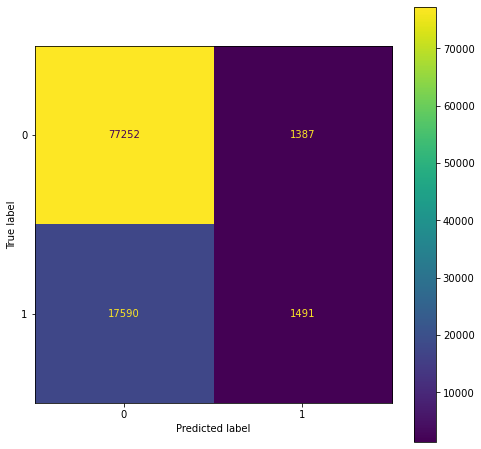

In [102]:
plt.rcParams['figure.figsize']=[8,8]
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [63]:
def metrics(y_test, y_pred, model_name):
    print('The metrics for the model ', model_name)
    print('')
    print('Accuracy score :', accuracy_score(y_test, y_pred))
    print('')
    print('Recall score :', recall_score(y_test, y_pred))
    print('')
    print('Precision score :', precision_score(y_test, y_pred))
    print('')
    print('F1 score :', f1_score(y_test, y_pred))
    print('')
    print('AUC score :', roc_auc_score(y_test, y_pred))
    print('')
    print('Classification Report')
    print(classification_report(y_test, y_pred))

In [64]:
metrics(y_test,y_pred,'Logi')

The metrics for the model  Logi

Accuracy score : 0.8053008595988539

Recall score : 0.0766207221843719

Precision score : 0.5095852213314744

F1 score : 0.13321184510250572

AUC score : 0.5293644182394031

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     78639
           1       0.51      0.08      0.13     19081

    accuracy                           0.81     97720
   macro avg       0.66      0.53      0.51     97720
weighted avg       0.75      0.81      0.74     97720



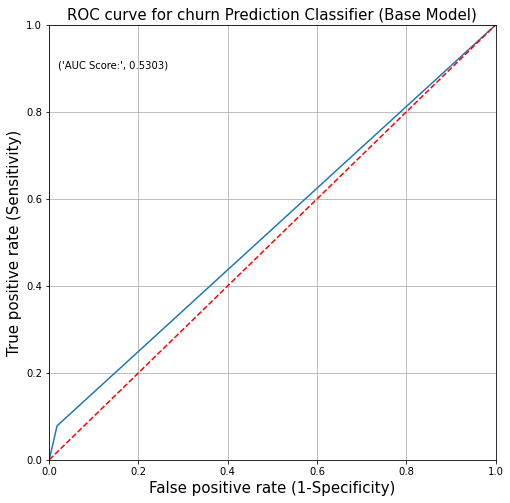

In [103]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for churn Prediction Classifier (Base Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

# Decision Tree

In [107]:
def get_train_report(model,x_train):
    
    train_pred = model.predict(x_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [108]:
def get_test_report(model,x_test):
    
    test_pred = model.predict(x_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [241]:
dt=DecisionTreeClassifier()
dc=dt.fit(x_train,y_train)
y_pred_dt=dc.predict(x_test)

In [242]:

# compute the performance measures on train data
train_report = get_train_report(dc,x_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(dc,x_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    183686
           1       1.00      1.00      1.00     44327

    accuracy                           1.00    228013
   macro avg       1.00      1.00      1.00    228013
weighted avg       1.00      1.00      1.00    228013

Test data:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     78639
           1       0.27      0.29      0.28     19081

    accuracy                           0.71     97720
   macro avg       0.55      0.55      0.55     97720
weighted avg       0.72      0.71      0.71     97720



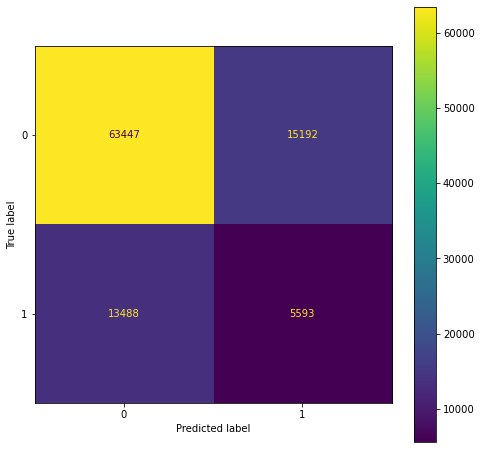

In [243]:
plt.rcParams['figure.figsize']=[8,8]
cm = confusion_matrix(y_test,y_pred_dt)
ConfusionMatrixDisplay(cm).plot()
plt.show()

**Interpretation**: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

# Hypertuning the Decision Tree

In [109]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)

In [111]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)


dt_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [244]:
dt_hype = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 2,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 2,
                                  min_samples_leaf = 1,
                                  min_samples_split =2,
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_hype = dt_hype.fit(x_train, y_train)
y_pred_dt_hype=dt_hype.predict(x_test)

In [245]:
# compute the performance measures on train data
train_report = get_train_report(dt_hype,x_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(dt_hype,x_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89    183686
           1       0.00      0.00      0.00     44327

    accuracy                           0.81    228013
   macro avg       0.40      0.50      0.45    228013
weighted avg       0.65      0.81      0.72    228013

Test data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     78639
           1       0.00      0.00      0.00     19081

    accuracy                           0.80     97720
   macro avg       0.40      0.50      0.45     97720
weighted avg       0.65      0.80      0.72     97720



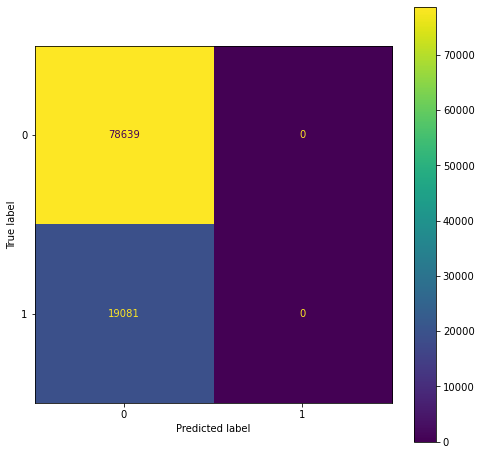

In [246]:
plt.rcParams['figure.figsize']=[8,8]
cm = confusion_matrix(y_test,y_pred_dt_hype)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [123]:
# The train and test Accuracy are comparable, which shows the reduction in overfitting.
# In this case the false negative and false positive values can be trusted and the FP value are quite High, but as our focus 
# is on reduction of False negative values



# Random Forest

In [61]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf.fit(x_train, y_train)
y_pred_rf=rf_model.predict(x_test)

In [67]:
# compute the performance measures on train data
train_report = get_train_report(rf_model,x_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(rf_model,x_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    183686
           1       1.00      0.89      0.94     44327

    accuracy                           0.98    228013
   macro avg       0.99      0.95      0.96    228013
weighted avg       0.98      0.98      0.98    228013

Test data:
               precision    recall  f1-score   support

           0       0.82      0.97      0.88     78639
           1       0.42      0.10      0.16     19081

    accuracy                           0.80     97720
   macro avg       0.62      0.53      0.52     97720
weighted avg       0.74      0.80      0.74     97720



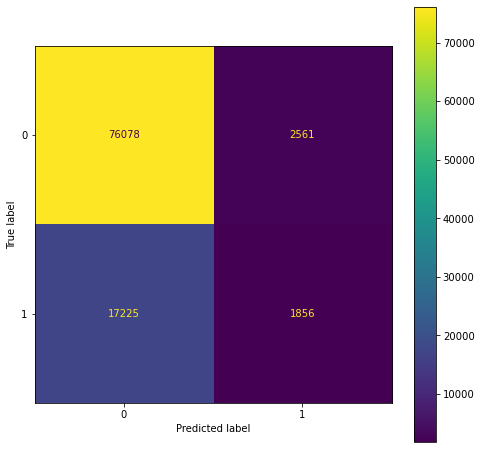

In [68]:
cm = confusion_matrix(y_test,y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
# From The above model, our train accuracy is 0.98 and test accuracy is 0.88, result is Overfitting
# As the model is over fitted, our false Negative and false Positive is inaccurate


# Hyperparameter tuning Random Forest

In [104]:
rf_hyp = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 15,
                                  max_features = 'log2',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 9,
                                  min_samples_split =13,
                                  n_estimators=100,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_hyp = rf_hyp.fit(x_train, y_train)
y_pred_rf_hyp=rf_hyp.predict(x_test)

In [109]:
train_report = get_train_report(rf_hyp,x_train)
print('Train data:\n', train_report)


test_report = get_test_report(rf_hyp,x_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89    183686
           1       0.00      0.00      0.00     44327

    accuracy                           0.81    228013
   macro avg       0.40      0.50      0.45    228013
weighted avg       0.65      0.81      0.72    228013

Test data:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     78639
           1       0.00      0.00      0.00     19081

    accuracy                           0.80     97720
   macro avg       0.40      0.50      0.45     97720
weighted avg       0.65      0.80      0.72     97720



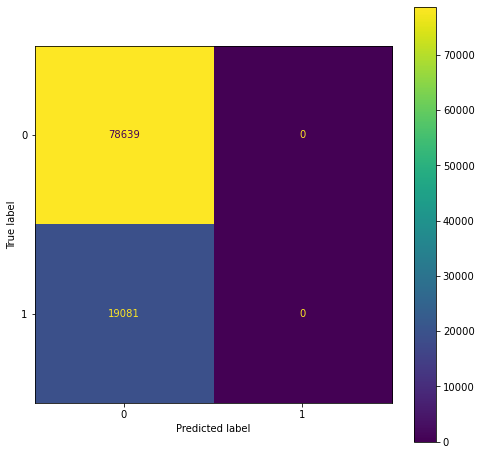

In [111]:
cm = confusion_matrix(y_test,y_pred_rf_hyp)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
# The train and test Accuracy are comparable, which shows the reduction in overfitting.
#In this case the false negative and false positive values can be trusted and the FP value are quite High,
# but as our focus is on reduction of False negative values


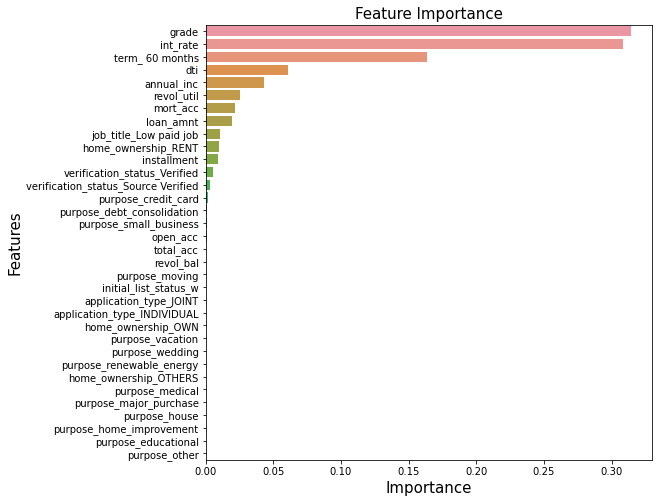

In [135]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_hyp.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [247]:
x=df2_feature
y=df2_target

In [248]:
kf=KFold(n_splits=10,shuffle=True,random_state=0)

In [263]:
clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'NaiveBayes':GaussianNB()
}

kf=KFold(n_splits=10,shuffle=True,random_state=0)
final_model_scores = pd.DataFrame(columns=['model name','recall scores','recall score','variance','accurcies','accuracy','accuracy_variance'])

for clf_name,clf in list(zip(clf.keys(),clf.values())):
    print('fitting model .....',clf_name)
    clf.fit(x,y)
    cv=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='recall')
    cv_auc=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='accuracy')
    t={
        'model name':clf_name,
        'recall scores':cv,
        'recall score':np.mean(cv ),
        'variance':np.std(cv,ddof=1),
        'accuracies':cv_auc,
        'accuracy':np.mean(cv_auc),
        'accuracy_variance':np.std(cv_auc,ddof=1)
    }
    final_model_scores = final_model_scores.append(t,ignore_index=True)
final_model_scores=final_model_scores.sort_values(by='recall score',ascending=False)
final_model_scores

fitting model ..... logistic regression
fitting model ..... KNN
fitting model ..... RandomForest
fitting model ..... DecisionTree
fitting model ..... XGBoost
fitting model ..... AdaBoost
fitting model ..... GradientBoost
fitting model ..... NaiveBayes


,model name,recall scores,recall score,variance,accurcies,accuracy,accuracy_variance,accuracies
7,NaiveBayes,"[0.45753381566530354, 0.44377952755905514, 0.4...",0.440096,0.011339,NaN,0.731504,0.003018,"[0.7341437956652545, 0.7275127402222632, 0.732..."
3,DecisionTree,"[0.2925448254167977, 0.28976377952755905, 0.29...",0.292411,0.002824,NaN,0.706164,0.002605,"[0.7047031374716031, 0.7031067722723645, 0.706..."
1,KNN,"[0.16294432211387228, 0.16346456692913386, 0.1...",0.161993,0.004432,NaN,0.781229,0.001089,"[0.7813593663658133, 0.7812365690427948, 0.782..."
4,XGBoost,"[0.08823529411764706, 0.09496062992125984, 0.0...",0.089991,0.005964,NaN,0.807342,0.00117,"[0.8067784122306134, 0.8071161048689138, 0.805..."
0,logistic regression,"[0.07769738911607424, 0.07653543307086615, 0.0...",0.079205,0.003235,NaN,0.806934,0.001293,"[0.8061951249462762, 0.8066863142383496, 0.805..."
2,RandomForest,"[0.07659641396665619, 0.07023622047244095, 0.0...",0.075902,0.004171,NaN,0.806529,0.001119,"[0.8065635169153312, 0.8057960336464665, 0.805..."
6,GradientBoost,"[0.06322743000943692, 0.05921259842519685, 0.0...",0.062597,0.003111,NaN,0.807944,0.001296,"[0.8075151961687235, 0.8075458954994781, 0.806..."
5,AdaBoost,"[0.061969172695816296, 0.056220472440944885, 0...",0.058901,0.003398,NaN,0.806912,0.001281,"[0.8074230981764597, 0.8068398108921225, 0.805..."
